# G2M Cab Data Analysis

## Virtual Internship 

### Alyssa Hubiak

The purpose of this analysis is to provide insight to XYZ, a private firm in US. Due to remarkable growth in the cab industry in last few years and multiple key players in the market, it is planning for an investment in Cab industry and as per their Go-to-Market(G2M) strategy they want to understand the market before taking final decision.

This analysis will be split into four parts:
1. Initialization and Loading Data
2. Data Cleaning and Preparation
3. Exploratory Data Analysis
3. Final Recommendations

## Initialization
We will begin by loading in any necessary libraries and loading in our four datasets which contain the cab data.

In [1]:
import pandas as pd #loading libraries
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import xlrd
from datetime import date

In [2]:
#loading data with try-except clause
try:
    cab_data = pd.read_csv('C:/Users/alyss/Desktop/DG/Week-2/DataSets/Cab_Data.csv')
    city_data = pd.read_csv('C:/Users/alyss/Desktop/DG/Week-2/DataSets/City.csv')
    customer_ID = pd.read_csv('C:/Users/alyss/Desktop/DG/Week-2/DataSets/Customer_ID.csv')
    transaction_ID = pd.read_csv('C:/Users/alyss/Desktop/DG/Week-2/DataSets/Transaction_ID.csv')
    holidays = pd.read_csv('C:/Users/alyss/Desktop/DG/Week-2/DataSets/US_Holiday_Dates.csv')
except: 
    print('File not found.')

Now we will examine the first few lines of each data set to get an idea of what they contain.

In [3]:
cab_data.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776


We can seen that the cab data set contains some general information about each trip taken.

In [4]:
city_data.head()

,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"


Our city data contains information regarding each city's population, and the number of cab users per city.

In [5]:
customer_ID.head()

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536


Our customer ID data contains information about each user by their unique customer identifier.

In [6]:
transaction_ID.head()

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card


Transaction ID contains the payment method used by each customer based on the unique transaction ID.

In [7]:
holidays.head()

,Date,Holiday,WeekDay,Month,Day,Year
0,2004-07-04,4th of July,Sunday,7,4,2004
1,2005-07-04,4th of July,Monday,7,4,2005
2,2006-07-04,4th of July,Tuesday,7,4,2006
3,2007-07-04,4th of July,Wednesday,7,4,2007
4,2008-07-04,4th of July,Friday,7,4,2008


Our holidays data contains all holiday dates from the years 2004-2021.

## Data Cleaning and Preparation
Now we will prepare our data for analysis by changing any necessary data types, merging our data sets, and checking for missing and duplicate values.

In [8]:
#converting date to datetime
holidays['Date'] = pd.to_datetime(holidays['Date'])

In [9]:
#creating a list of just the dates of holidays
holidays_list = list(holidays['Date'])

Now we will merge our datasets. We will use cab data as our master set, and merge on the unique IDs to create a single dataset containing all necessary values.

In [10]:
cab_city = cab_data.merge(right=city_data, how='inner', on='City') #adding city info by city identifier
cab_city.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Population,Users
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635,"814,885","24,701"
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854,"814,885","24,701"
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632,"814,885","24,701"
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602,"814,885","24,701"
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776,"814,885","24,701"


In [11]:
#adding transaction info by unique transaction ID
cab_city_transaction = cab_city.merge(right=transaction_ID, how='inner', on="Transaction ID") 
cab_city_transaction.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Population,Users,Customer ID,Payment_Mode
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635,"814,885","24,701",29290,Card
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854,"814,885","24,701",27703,Card
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632,"814,885","24,701",28712,Cash
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602,"814,885","24,701",28020,Cash
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776,"814,885","24,701",27182,Card


In [12]:
#adding customer info by unique customer ID
cab_df = customer_ID.merge(right=cab_city_transaction, how='inner', on='Customer ID')
cab_df.head()

,Customer ID,Gender,Age,Income (USD/Month),Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Population,Users,Payment_Mode
0,29290,Male,28,10813,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,"814,885","24,701",Card
1,29290,Male,28,10813,10351127,43302,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,"814,885","24,701",Cash
2,29290,Male,28,10813,10412921,43427,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,"814,885","24,701",Card
3,27703,Male,27,9237,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,"814,885","24,701",Card
4,27703,Male,27,9237,10320494,43211,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,"814,885","24,701",Card


Now we will check if there are any duplicates.

In [13]:
duplicated = cab_df[cab_df.duplicated()]
print(duplicated)

Empty DataFrame
Columns: [Customer ID, Gender, Age, Income (USD/Month), Transaction ID, Date of Travel, Company, City, KM Travelled, Price Charged, Cost of Trip, Population, Users, Payment_Mode]
Index: []


Now that we see there are no true duplicates, we will change our naming scheme for our columns to not contain spaces or special characters other than underscores.

In [14]:
cab_df.rename(columns = {'Customer ID': 'Customer_ID', 
                         'Income (USD/Month)': 'Income',
                        'Transaction ID': 'Transaction_ID',
                        'Date of Travel': 'Date_of_Travel',
                        'KM Travelled': 'KM_Traveled',
                        'Price Charged': 'Price_Charged',
                        'Cost of Trip': 'Cost_of_Trip'}, inplace=True)
cab_df.head()

,Customer_ID,Gender,Age,Income,Transaction_ID,Date_of_Travel,Company,City,KM_Traveled,Price_Charged,Cost_of_Trip,Population,Users,Payment_Mode
0,29290,Male,28,10813,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,"814,885","24,701",Card
1,29290,Male,28,10813,10351127,43302,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,"814,885","24,701",Cash
2,29290,Male,28,10813,10412921,43427,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,"814,885","24,701",Card
3,27703,Male,27,9237,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,"814,885","24,701",Card
4,27703,Male,27,9237,10320494,43211,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,"814,885","24,701",Card


Now we will convert the excel date codes into a python datetime object which will make our analyis easier.

In [15]:
datetime= []
for i in range(0,len(cab_df)):
    xl_date = cab_df['Date_of_Travel'][i]
    datetime_date = (xlrd.xldate_as_datetime(xl_date,0))
    datetime.append(datetime_date.date())

In [16]:
cab_df['Date_of_Travel'] = datetime
cab_df.head()

,Customer_ID,Gender,Age,Income,Transaction_ID,Date_of_Travel,Company,City,KM_Traveled,Price_Charged,Cost_of_Trip,Population,Users,Payment_Mode
0,29290,Male,28,10813,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,"814,885","24,701",Card
1,29290,Male,28,10813,10351127,2018-07-21,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,"814,885","24,701",Cash
2,29290,Male,28,10813,10412921,2018-11-23,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,"814,885","24,701",Card
3,27703,Male,27,9237,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,"814,885","24,701",Card
4,27703,Male,27,9237,10320494,2018-04-21,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,"814,885","24,701",Card


Now that we have cleaned our data, we will add some calculated columns. We will begin by calculation the profit based on the price charged and the cost of the trip.

In [17]:
cab_df['Profit'] = cab_df['Price_Charged'] - cab_df['Cost_of_Trip']
cab_df.head()

,Customer_ID,Gender,Age,Income,Transaction_ID,Date_of_Travel,Company,City,KM_Traveled,Price_Charged,Cost_of_Trip,Population,Users,Payment_Mode,Profit
0,29290,Male,28,10813,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,"814,885","24,701",Card,57.3150
1,29290,Male,28,10813,10351127,2018-07-21,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,"814,885","24,701",Cash,281.2772
2,29290,Male,28,10813,10412921,2018-11-23,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,"814,885","24,701",Card,194.6480
3,27703,Male,27,9237,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,"814,885","24,701",Card,23.6660
4,27703,Male,27,9237,10320494,2018-04-21,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,"814,885","24,701",Card,253.9808


In [18]:
cab_df.dtypes #checking column types

Customer_ID         int64
Gender             object
Age                 int64
Income              int64
Transaction_ID      int64
Date_of_Travel     object
Company            object
City               object
KM_Traveled       float64
Price_Charged     float64
Cost_of_Trip      float64
Population         object
Users              object
Payment_Mode       object
Profit            float64
dtype: object

Now we will create a boolean column to stand for if a ride occurs on a holiday by comparing date of travel to our list of holiday dates.

In [19]:
is_holiday = []
for i in range(0, len(cab_df)):
    if cab_df['Date_of_Travel'][i] in holidays_list:
        is_holiday.append(1)
    else:
        is_holiday.append(0)

C:\Users\alyss\anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [20]:
cab_df['Is_Holiday'] = is_holiday
cab_df.head()

,Customer_ID,Gender,Age,Income,Transaction_ID,Date_of_Travel,Company,City,KM_Traveled,Price_Charged,Cost_of_Trip,Population,Users,Payment_Mode,Profit,Is_Holiday
0,29290,Male,28,10813,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,"814,885","24,701",Card,57.3150,0
1,29290,Male,28,10813,10351127,2018-07-21,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,"814,885","24,701",Cash,281.2772,0
2,29290,Male,28,10813,10412921,2018-11-23,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,"814,885","24,701",Card,194.6480,0
3,27703,Male,27,9237,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,"814,885","24,701",Card,23.6660,0
4,27703,Male,27,9237,10320494,2018-04-21,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,"814,885","24,701",Card,253.9808,0


In [21]:
cab_df['Is_Holiday'].value_counts()

0    340748
1     18644
Name: Is_Holiday, dtype: int64

We can see that we have 18,644 rides occurring on holidays. Now we will examine our companies.

In [22]:
cab_df['Company'].value_counts()

Yellow Cab    274681
Pink Cab       84711
Name: Company, dtype: int64

We can see that our dataset covers two cab companies: Yellow Cab and Pink Cab.
We will now pull our year from our date in order to make yearly analysis easier.

In [23]:
year =[]
for i in range(0, len(cab_df)):
    year_1 = cab_df['Date_of_Travel'][i].year
    year.append(year_1)
cab_df['Year'] = year

In [24]:
cab_df.head()

,Customer_ID,Gender,Age,Income,Transaction_ID,Date_of_Travel,Company,City,KM_Traveled,Price_Charged,Cost_of_Trip,Population,Users,Payment_Mode,Profit,Is_Holiday,Year
0,29290,Male,28,10813,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,"814,885","24,701",Card,57.3150,0,2016
1,29290,Male,28,10813,10351127,2018-07-21,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,"814,885","24,701",Cash,281.2772,0,2018
2,29290,Male,28,10813,10412921,2018-11-23,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,"814,885","24,701",Card,194.6480,0,2018
3,27703,Male,27,9237,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,"814,885","24,701",Card,23.6660,0,2016
4,27703,Male,27,9237,10320494,2018-04-21,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,"814,885","24,701",Card,253.9808,0,2018


Now will calculate the profit percentage by dividing the profit by the cost of the trip and multiplying by 100.

In [25]:
cab_df['Profit_Percentage'] = (cab_df['Profit'] / cab_df['Cost_of_Trip']) * 100

Now we will find the profit per KM traveled by dividing our profit by the distance traveled on a given trip.

In [26]:
cab_df['Profit_Per_KM'] = cab_df['Profit'] / cab_df['KM_Traveled']

Next we will create a classification for income class based on a customer's given income.

In [27]:
class_list = []
for i in range(0, len(cab_df)):
    if cab_df['Income'][i] > 15000:
        class_list.append('>15000')
    elif cab_df['Income'][i] < 2500:
        class_list.append('<2500')
    else:
        class_list.append('2500-15000')
cab_df['Class'] = class_list

We will also take a closer look at the ages of our customers, and divide them into age classifications as well.

In [28]:
print(min(cab_df['Age']))

18


In [29]:
age_group_list = []
for i in range(0, len(cab_df)):
    if cab_df['Age'][i] > 60:
        age_group_list.append('61+')
    elif cab_df['Age'][i] <=25:
        age_group_list.append('18-25')
    elif cab_df['Age'][i] <=40:
        age_group_list.append('26-40')
    else:
        age_group_list.append('41-60')
cab_df['Age_Group'] = age_group_list

We will also create a classification based on the ride distance for each ride.

In [30]:
rounded_KM = []
for i in range(0, len(cab_df)):
    if cab_df['KM_Traveled'][i] <5:
        rounded_KM.append(0)
    elif 5<= cab_df['KM_Traveled'][i] <10:
        rounded_KM.append(5)
    elif 10<= cab_df['KM_Traveled'][i] <15:
        rounded_KM.append(10)
    elif 15<= cab_df['KM_Traveled'][i] <20:
        rounded_KM.append(15)
    elif 20<= cab_df['KM_Traveled'][i] <25:
        rounded_KM.append(20)
    elif 25<= cab_df['KM_Traveled'][i] <30:
        rounded_KM.append(25)
    elif 30<= cab_df['KM_Traveled'][i] <35:
        rounded_KM.append(30)
    elif 35<= cab_df['KM_Traveled'][i] <40:
        rounded_KM.append(35)
    elif 40<= cab_df['KM_Traveled'][i] <45:
        rounded_KM.append(40)
    else:
        rounded_KM.append(45)
cab_df['Rounded_KM'] = rounded_KM

Now we will split our data set into two sets for each company; we will use the whole dataset for some data and we will use our split data for others.

In [31]:
yellow_cab_df = cab_df[cab_df['Company'] == 'Yellow Cab']
pink_cab_df = cab_df[cab_df['Company'] == 'Pink Cab']

In [32]:
yellow_cab_df.head()

,Customer_ID,Gender,Age,Income,Transaction_ID,Date_of_Travel,Company,City,KM_Traveled,Price_Charged,...,Users,Payment_Mode,Profit,Is_Holiday,Year,Profit_Percentage,Profit_Per_KM,Class,Age_Group,Rounded_KM
1,29290,Male,28,10813,10351127,2018-07-21,Yellow Cab,ATLANTA GA,26.19,598.70,...,"24,701",Cash,281.2772,0,2018,88.612790,10.739870,2500-15000,26-40,25
2,29290,Male,28,10813,10412921,2018-11-23,Yellow Cab,ATLANTA GA,42.55,792.05,...,"24,701",Card,194.6480,0,2018,32.582415,4.574571,2500-15000,26-40,40
4,27703,Male,27,9237,10320494,2018-04-21,Yellow Cab,ATLANTA GA,36.38,721.10,...,"24,701",Card,253.9808,0,2018,54.371732,6.981330,2500-15000,26-40,35
5,27703,Male,27,9237,10324737,2018-05-04,Yellow Cab,ATLANTA GA,6.18,138.40,...,"24,701",Cash,50.8912,0,2018,58.155523,8.234822,2500-15000,26-40,5
8,28712,Male,53,11242,10079404,2016-09-21,Yellow Cab,ATLANTA GA,39.60,704.30,...,"24,701",Card,210.0920,0,2016,42.510846,5.305354,2500-15000,41-60,35


In [33]:
pink_cab_df.head()

,Customer_ID,Gender,Age,Income,Transaction_ID,Date_of_Travel,Company,City,KM_Traveled,Price_Charged,...,Users,Payment_Mode,Profit,Is_Holiday,Year,Profit_Percentage,Profit_Per_KM,Class,Age_Group,Rounded_KM
0,29290,Male,28,10813,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,...,"24,701",Card,57.315,0,2016,18.274427,1.882266,2500-15000,26-40,30
3,27703,Male,27,9237,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,...,"24,701",Card,23.666,0,2016,7.067558,0.826904,2500-15000,26-40,25
6,27703,Male,27,9237,10395626,2018-10-27,Pink Cab,ATLANTA GA,13.39,167.03,...,"24,701",Card,25.096,0,2018,17.681458,1.874235,2500-15000,26-40,10
7,28712,Male,53,11242,10000013,2016-01-02,Pink Cab,ATLANTA GA,9.04,125.20,...,"24,701",Cash,27.568,0,2016,28.236644,3.049558,2500-15000,41-60,5
11,28020,Male,23,23327,10000014,2016-01-07,Pink Cab,ATLANTA GA,33.17,377.40,...,"24,701",Cash,25.798,0,2016,7.337273,0.777751,>15000,18-25,30


## Exploratory Data Analysis
Now we will create some visualizations to fully explore our data. First we will create a table to compare the profit for yellow cab and pink cab based on total rides and total profit compared to profit per ride.

In [34]:
pink_profit = sum(pink_cab_df['Profit']) #calculating total profit
yellow_profit = sum(yellow_cab_df['Profit'])
pink_rides = len(pink_cab_df) #calculating number of rides
yellow_rides = len(yellow_cab_df)
pink_ppr = pink_profit / pink_rides #calculating profit per ride
yellow_ppr = yellow_profit / yellow_rides

In [35]:
profit_df = pd.DataFrame() #creating dataframe of compared data
profit_df['Company'] = ['Yellow Cab', 'Pink_Cab']
profit_df['Total_Rides'] = [yellow_rides, pink_rides]
profit_df['Profit'] = [round(yellow_profit, 2), round(pink_profit,2)]
profit_df['Profit Per Ride'] = [yellow_ppr, pink_ppr]

In [36]:
display(profit_df)

,Company,Total_Rides,Profit,Profit Per Ride
0,Yellow Cab,274681,44020373.17,160.259986
1,Pink_Cab,84711,5307328.32,62.652174


We can see that overall Yellow Cab not only has more rides, but makes significantly more profit per ride than Pink Cab. Lets look at profit percentage on an annual basis.

In [37]:
#creating pivot table of profit percentage to graph
pp_pivot = pd.pivot_table(cab_df, values ='Profit_Percentage', index='Year', columns='Company', aggfunc=np.mean)

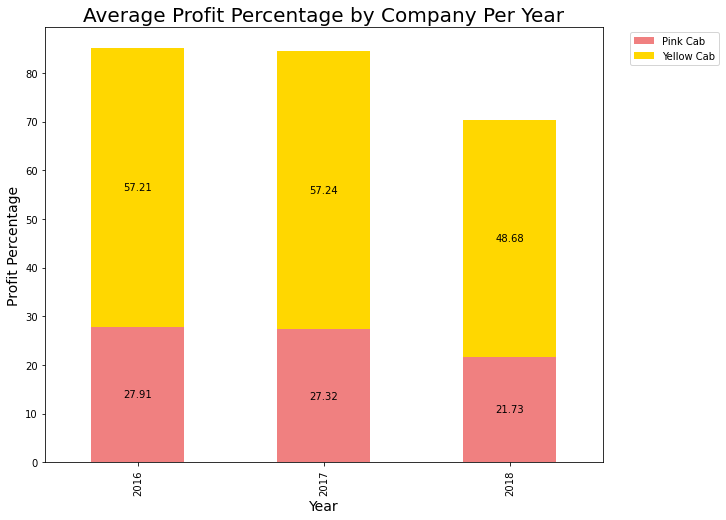

In [38]:
#plt.figure(figsize =(100,100))
ax = pp_pivot.plot(kind='bar', color=['lightcoral', 'gold'], stacked=True)
for c in ax.containers:
    labels = [v.get_height() if v.get_height() > 0 else '' for v in c]
    labels = np.round(labels,2)
    ax.bar_label(c, labels=labels, label_type='center')
plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left")
plt.title('Average Profit Percentage by Company Per Year', fontsize=20)
plt.ylabel('Profit Percentage', fontsize=14)
plt.xlabel('Year', fontsize=14)
plt.gcf().set_size_inches(10, 8)
plt.show()

We can see that both companies had a stable profit percentage between 2016 and 2017, with a loss in the year 2018 for both companies. Yellow Cab had more loss than Pink Cab did.

Now we will exam the profit percentage by company by city.

In [39]:
#create pivot table
pp_city_pivot = pd.pivot_table(cab_df, values ='Profit_Percentage', index='City', columns='Company', aggfunc=np.mean)
display(pp_city_pivot)

Company,Pink Cab,Yellow Cab
City,,
ATLANTA GA,22.366576,44.345863
AUSTIN TX,33.124570,42.639859
BOSTON MA,20.682036,20.991244
CHICAGO IL,14.062613,22.053429
DALLAS TX,7.834718,66.155995
DENVER CO,11.961548,49.940618
LOS ANGELES CA,23.113694,39.375101
MIAMI FL,33.004664,44.901656
NASHVILLE TN,14.243584,24.621837


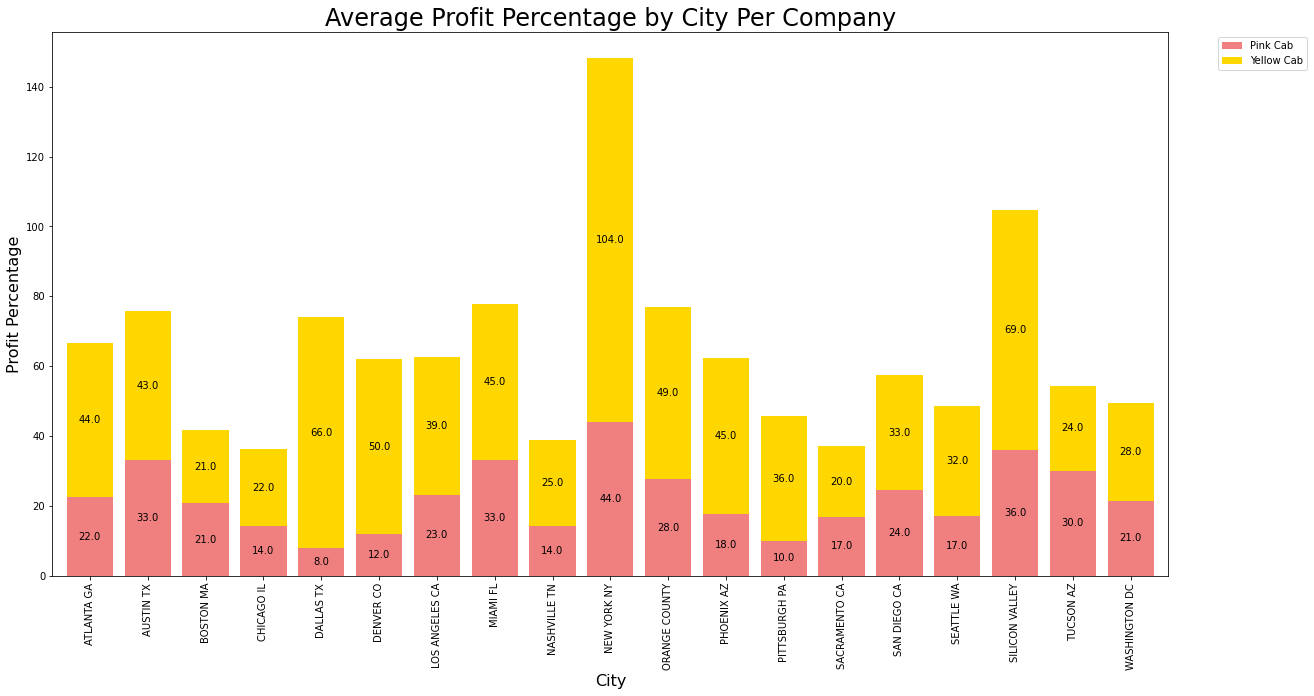

In [40]:
ax = pp_city_pivot.plot(kind='bar', color=['lightcoral', 'gold'], stacked=True, width =0.8) #create graph
for c in ax.containers:
    labels = [v.get_height() if v.get_height() > 0 else '' for v in c]
    labels = np.round(labels)
    ax.bar_label(c, labels=labels, label_type='center')
plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left")
plt.title('Average Profit Percentage by City Per Company', fontsize=24)
plt.ylabel('Profit Percentage', fontsize=16)
plt.xlabel('City', fontsize=16)
plt.gcf().set_size_inches(20, 10)
plt.show()

We can see that overall, Yellow Cab performs better than Pink Cab in most cities based on profit percentage. Pink Cab performed the same or better than Yellow Cab in Boston and Tucson.

Let us see if the same is true for the profit per KM traveled.

In [41]:
pkm_pivot = pd.pivot_table(cab_df, values ='Profit_Per_KM', index='Year', columns='Company', aggfunc=np.mean)
display(pkm_pivot)

Company,Pink Cab,Yellow Cab
Year,,
2016,3.026813,7.489847
2017,2.962883,7.494612
2018,2.350447,6.364805


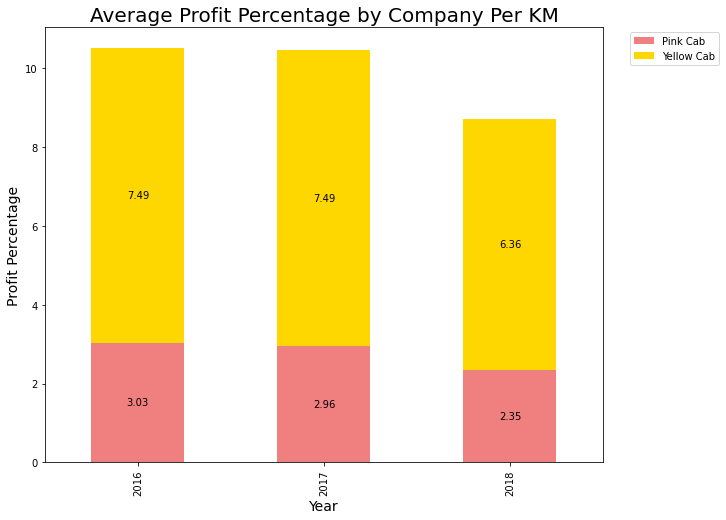

In [42]:
ax = pkm_pivot.plot(kind='bar', color=['lightcoral', 'gold'], stacked=True)
for c in ax.containers:
    labels = [v.get_height() if v.get_height() > 0 else '' for v in c]
    labels = np.round(labels, 2)
    ax.bar_label(c, labels=labels, label_type='center')
plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left")
plt.title('Average Profit Percentage by Company Per KM', fontsize=20)
plt.ylabel('Profit Percentage', fontsize=14)
plt.xlabel('Year', fontsize=14)
plt.gcf().set_size_inches(10, 8)
plt.show()

In [43]:
yearly_profit_pivot = pd.pivot_table(cab_df, values ='Profit', index='Year', columns='Company', aggfunc=np.sum)
display(yearly_profit_pivot)

Company,Pink Cab,Yellow Cab
Year,,
2016,1713511.224,1.392700e+07
2017,2033654.908,1.657598e+07
2018,1560162.189,1.351740e+07


In [44]:
yearly_profit_pivot.reset_index()
pypp = yearly_profit_pivot.drop(columns='Yellow Cab')
yypp = yearly_profit_pivot.drop(columns='Pink Cab')

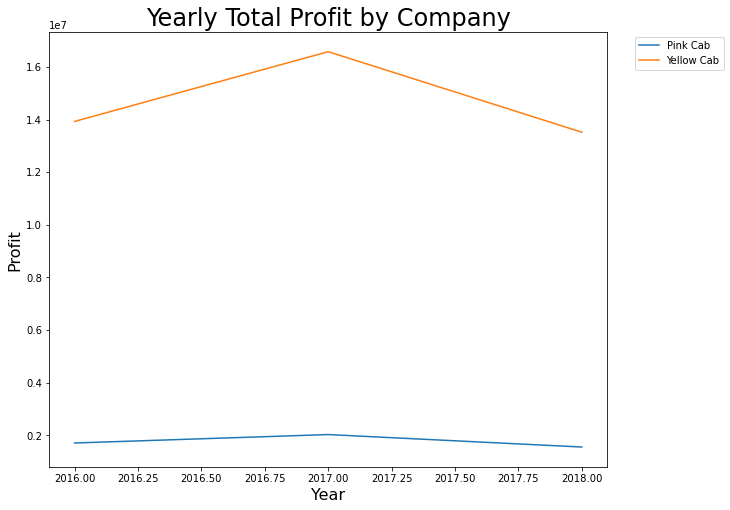

In [45]:
plt.plot(pypp, label='Pink Cab')
plt.plot(yypp, label='Yellow Cab')
plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left")
plt.title('Yearly Total Profit by Company', fontsize=24)
plt.ylabel('Profit', fontsize=16)
plt.xlabel('Year', fontsize=16)
plt.gcf().set_size_inches(10, 8)

From this graph, we can see that Yellow Cab does make significantly more in profit, but they also experienced a more significant loss than Pink Cab in the year 2018.

Let us now examine the spread of gender between the two companies to see if there is any customer difference per year. We will examine Yellow Cab first.

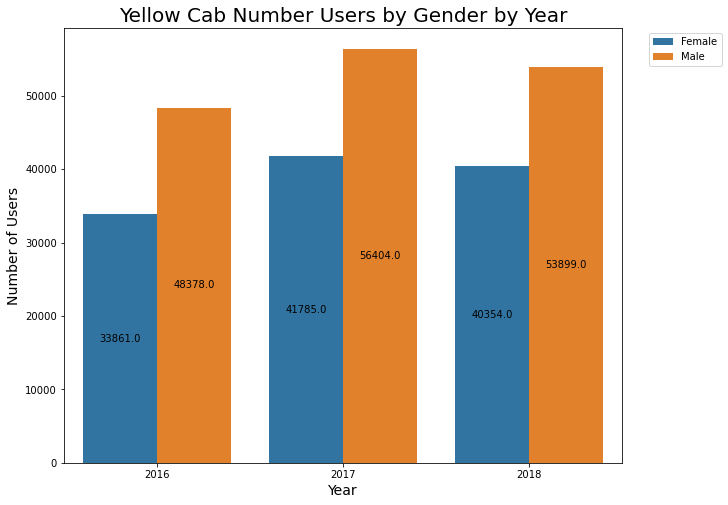

In [46]:
df15 = yellow_cab_df.groupby(['Year', 'Gender']).agg(count=("Customer_ID", 'count')) #creating table
df15 = df15.reset_index()
ax = sns.barplot(x="Year",y="count", hue="Gender",data=df15) #creating graph
for c in ax.containers: #generating labels
    labels = [v.get_height() if v.get_height() > 0 else '' for v in c]
    labels = np.round(labels)
    ax.bar_label(c, labels=labels, label_type='center')
plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left") 
plt.title('Yellow Cab Number Users by Gender by Year', fontsize=20)
plt.ylabel('Number of Users', fontsize=14)
plt.xlabel('Year', fontsize=14)
plt.gcf().set_size_inches(10, 8)
plt.show()

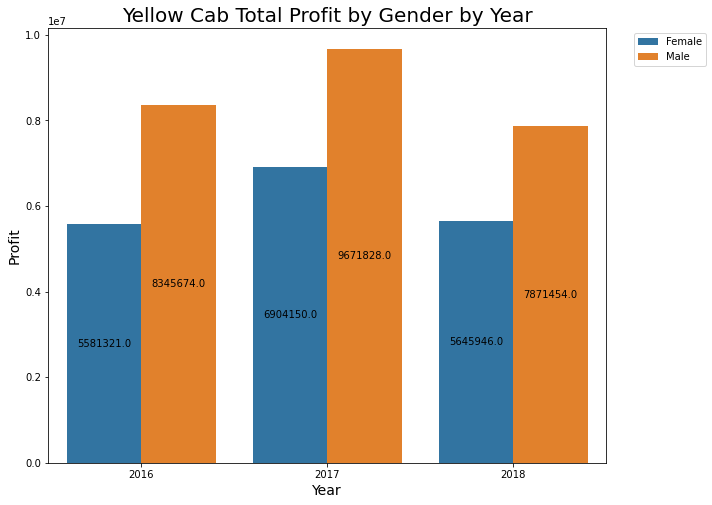

In [47]:
df = yellow_cab_df.groupby(['Year', 'Gender']).agg(sum_profit=("Profit", 'sum')) #creating table
df = df.reset_index()
ax = sns.barplot(x="Year",y="sum_profit", hue="Gender",data=df) #creating graph
for c in ax.containers: #generating labels
    labels = [v.get_height() if v.get_height() > 0 else '' for v in c]
    labels = np.round(labels)
    ax.bar_label(c, labels=labels, label_type='center')
plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left") 
plt.title('Yellow Cab Total Profit by Gender by Year', fontsize=20)
plt.ylabel('Profit', fontsize=14)
plt.xlabel('Year', fontsize=14)
plt.gcf().set_size_inches(10, 8)
plt.show()

We can see that there are more male clients for each each year compared to females for the Yellow Cab company. The difference between then remains approximately the same year-to-year. Let us now compare this to Pink Cab.

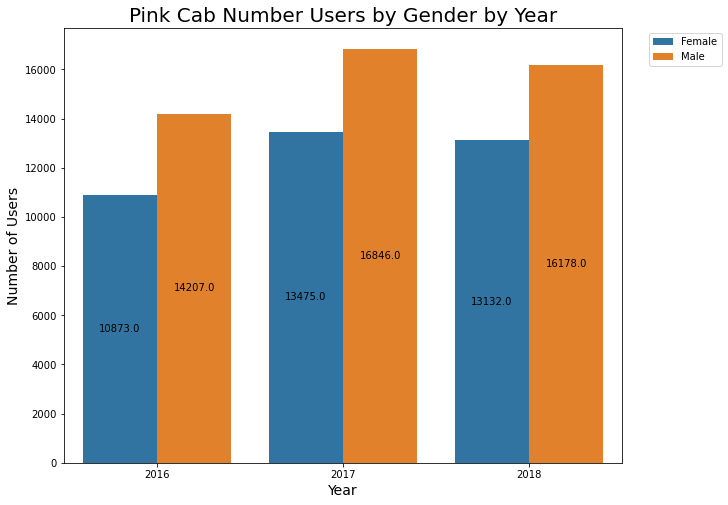

In [48]:
df16 = pink_cab_df.groupby(['Year', 'Gender']).agg(count=("Customer_ID", 'count')) #creating table
df16 = df16.reset_index()
ax = sns.barplot(x="Year",y="count", hue="Gender",data=df16) #creating graph
for c in ax.containers: #generating labels
    labels = [v.get_height() if v.get_height() > 0 else '' for v in c]
    labels = np.round(labels)
    ax.bar_label(c, labels=labels, label_type='center')
plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left") 
plt.title('Pink Cab Number Users by Gender by Year', fontsize=20)
plt.ylabel('Number of Users', fontsize=14)
plt.xlabel('Year', fontsize=14)
plt.gcf().set_size_inches(10, 8)
plt.show()

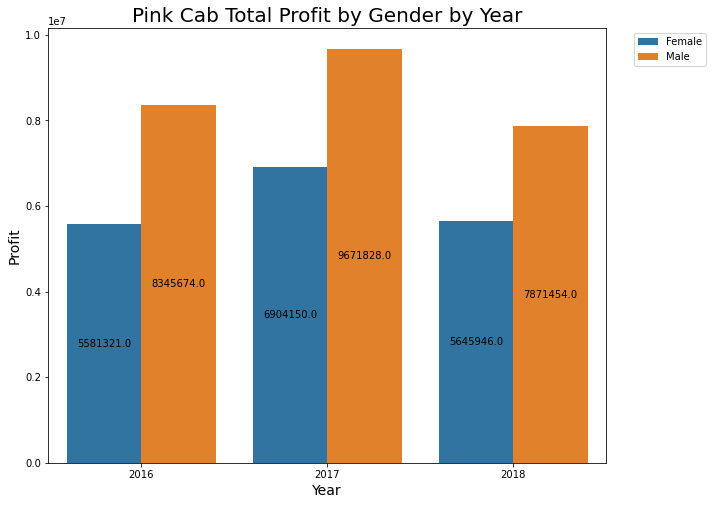

In [49]:
df2 = pink_cab_df.groupby(['Year', 'Gender']).agg(sum_profit=("Profit", 'sum')) #creating table
df2 = df.reset_index()
ax = sns.barplot(x="Year",y="sum_profit", hue="Gender",data=df) #creating graph
for c in ax.containers: #generating labels
    labels = [v.get_height() if v.get_height() > 0 else '' for v in c]
    labels = np.round(labels)
    ax.bar_label(c, labels=labels, label_type='center')
plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left")
plt.title('Pink Cab Total Profit by Gender by Year', fontsize=20)
plt.ylabel('Profit', fontsize=14)
plt.xlabel('Year', fontsize=14)
plt.gcf().set_size_inches(10, 8)
plt.show()

We can see that the Pink Cab company has a similar level of male vs female clientele. Let us see if this is also true for different income classes.

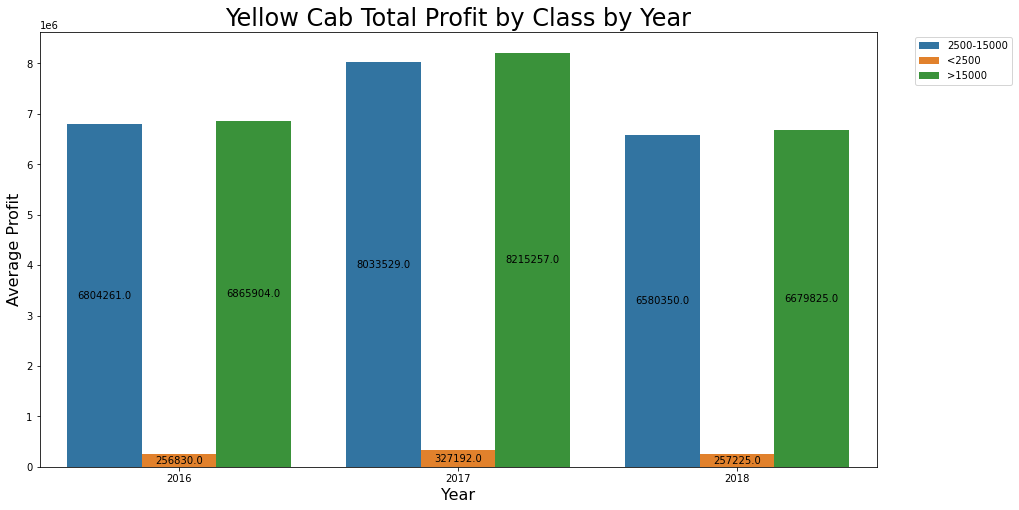

In [50]:
df3 = yellow_cab_df.groupby(['Year', 'Class']).agg(sum_profit=("Profit", 'sum')) #creating table
df3 = df3.reset_index()
ax = sns.barplot(x="Year",y="sum_profit", hue="Class",data=df3) #creating graph
for c in ax.containers: #generating labels
    labels = [v.get_height() if v.get_height() > 0 else '' for v in c]
    labels = np.round(labels)
    ax.bar_label(c, labels=labels, label_type='center')
plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left")
plt.title('Yellow Cab Total Profit by Class by Year', fontsize=24)
plt.ylabel('Average Profit',fontsize=16)
plt.xlabel('Year', fontsize=16)
plt.gcf().set_size_inches(15, 8)
plt.show()

We can see that low income class contributes the least overall yearly. Middle and upper class are very similar with upper class contributing slightly more. 

Let us see if the same is true for that of pink cab.

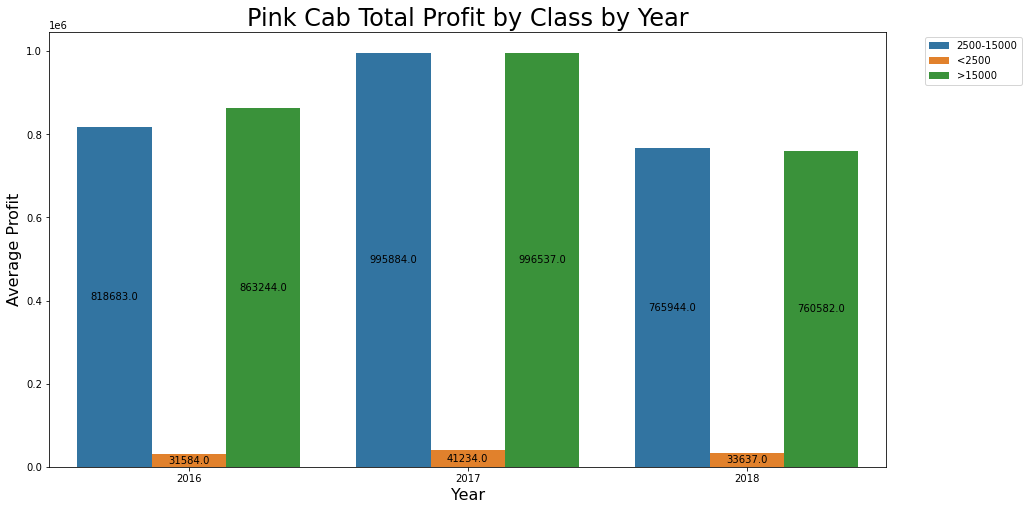

In [51]:
df4 = pink_cab_df.groupby(['Year', 'Class']).agg(sum_profit=("Profit", 'sum')) #creating table
df4 = df4.reset_index()
ax = sns.barplot(x="Year",y="sum_profit", hue="Class",data=df4) #creating graph
for c in ax.containers: #generating labels
    labels = [v.get_height() if v.get_height() > 0 else '' for v in c]
    labels = np.round(labels)
    ax.bar_label(c, labels=labels, label_type='center')
plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left")
plt.title('Pink Cab Total Profit by Class by Year', fontsize=24)
plt.ylabel('Average Profit', fontsize=16)
plt.xlabel('Year', fontsize=16)
plt.gcf().set_size_inches(15, 8)
plt.show()

It appears that for the Pink Cab company, there was similar levels of contribution from the low class to that of the Yellow Cab company. However, the middle class and upper class contribute much more closely than that of Yellow Cab.


Now we will examine if the total number of rides experiences a similar spread based on income class and year.

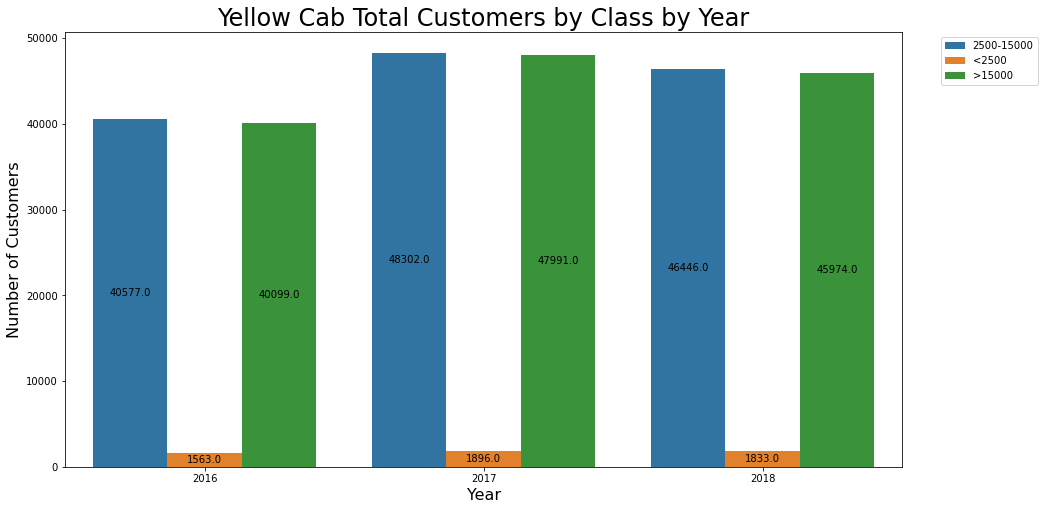

In [52]:
df5 = yellow_cab_df.groupby(['Year', 'Class']).agg(count=("Customer_ID", 'count')) #creating table
df5 = df5.reset_index()
ax = sns.barplot(x="Year",y="count", hue="Class",data=df5) #creating graph
for c in ax.containers: #generating labels
    labels = [v.get_height() if v.get_height() > 0 else '' for v in c]
    labels= np.round(labels)
    ax.bar_label(c, labels=labels, label_type='center')
plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left")
plt.title('Yellow Cab Total Customers by Class by Year', fontsize=24)
plt.ylabel('Number of Customers', fontsize=16)
plt.xlabel('Year', fontsize=16)
plt.gcf().set_size_inches(15, 8)
plt.show()

It seems like the middle class clients actually have more total rides than that of the high class even though they contribute less profit. This leads us to believe that they are likely traveling shorter distances.


Let us compare this to the Pink Cab company.

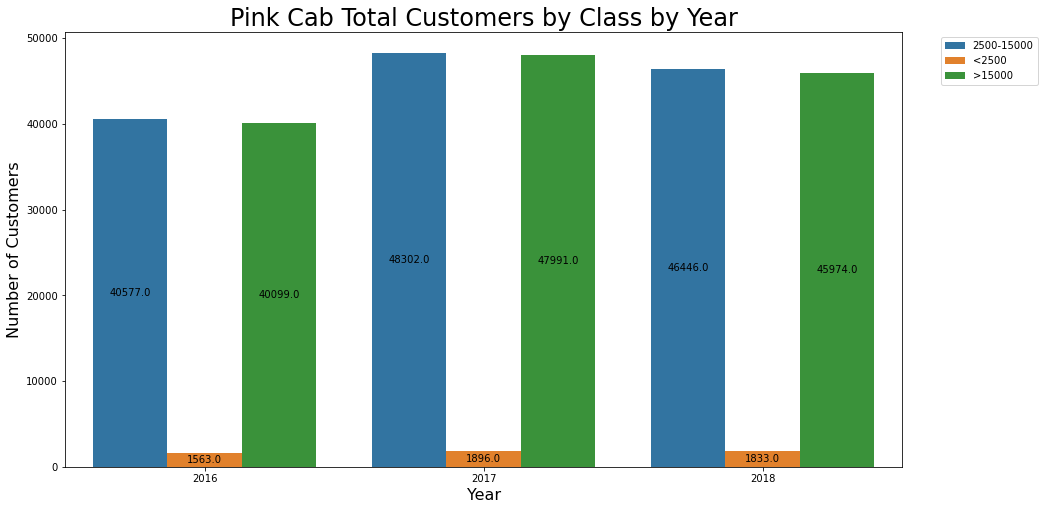

In [53]:
df6 = pink_cab_df.groupby(['Year', 'Class']).agg(count=("Customer_ID", 'count')) #creating table
df6 = df5.reset_index()
ax = sns.barplot(x="Year",y="count", hue="Class",data=df6) #generating graph
for c in ax.containers: #generating labels
    labels = [v.get_height() if v.get_height() > 0 else '' for v in c]
    lables = np.round(labels)
    ax.bar_label(c, labels=labels, label_type='center')
plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left")
plt.title('Pink Cab Total Customers by Class by Year', fontsize=24)
plt.ylabel('Number of Customers', fontsize=16)
plt.xlabel('Year', fontsize=16)
plt.gcf().set_size_inches(15, 8)
plt.show()

Similar to that of Yellow Cab, the middle class does have slightly more rides than that of the high class,  but they contribute much more similarly to profit than Yellow Cab.


We will now examine the clients based on their age groups.

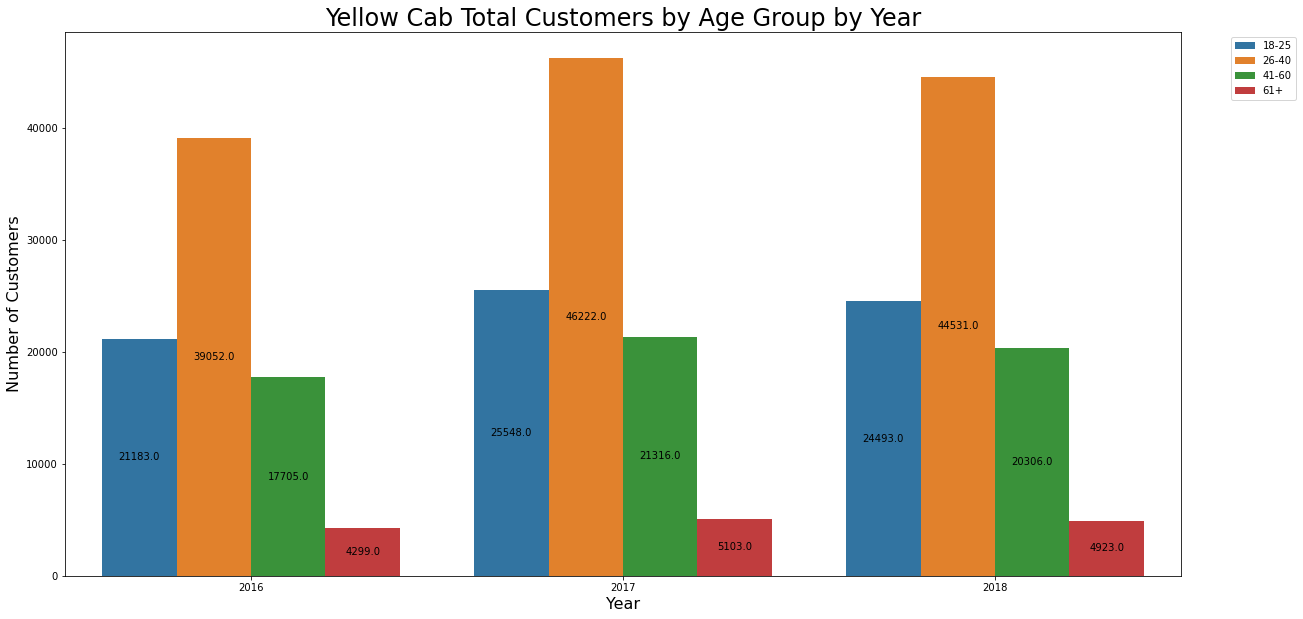

In [54]:
df7 = yellow_cab_df.groupby(['Year', 'Age_Group']).agg(count=("Customer_ID", 'count')) #creating table
df7 = df7.reset_index()
ax = sns.barplot(x="Year",y="count", hue="Age_Group",data=df7) #creating graph
for c in ax.containers: #generating labels
    labels = [v.get_height() if v.get_height() > 0 else '' for v in c]
    labels = np.round(labels)
    ax.bar_label(c, labels=labels, label_type='center')
plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left")
plt.title('Yellow Cab Total Customers by Age Group by Year', fontsize=24)
plt.ylabel('Number of Customers', fontsize=16)
plt.xlabel('Year', fontsize=16)
plt.gcf().set_size_inches(20, 10)
plt.show()

We can see that most of Yellow Cab clients are in the 26-40 age group, followed by 18-25. The spread across age groups appears very similar year to year. 

Let us see if the same is true for that of Pink Cab.

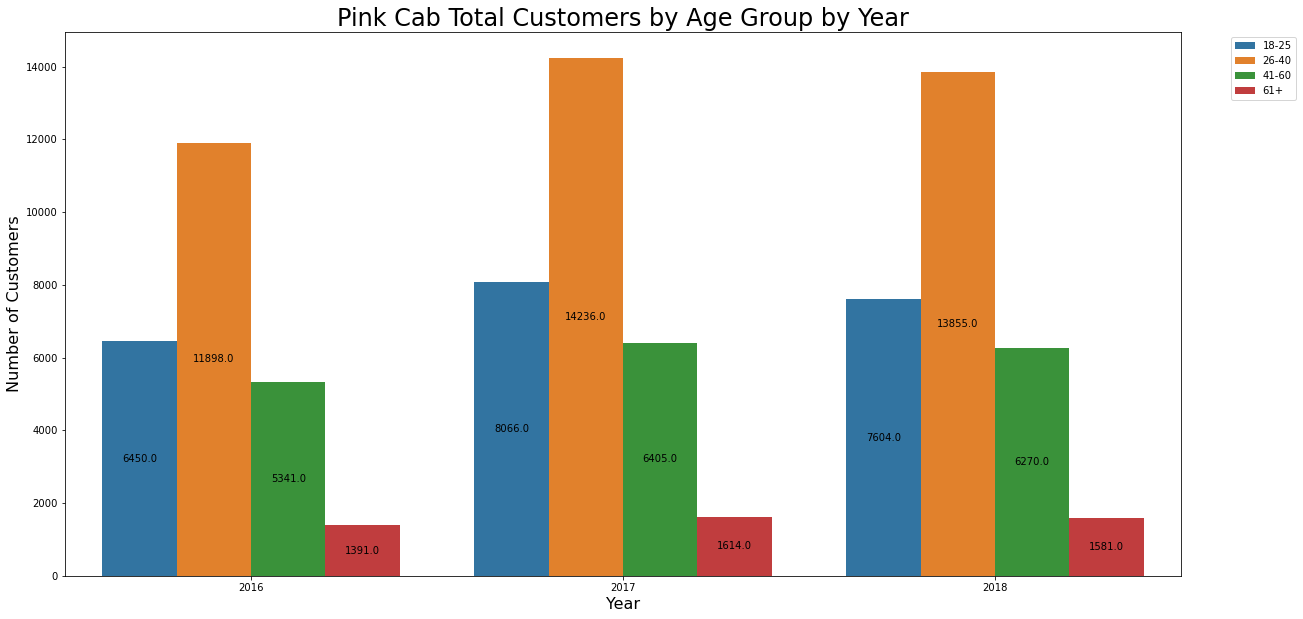

In [55]:
df8 = pink_cab_df.groupby(['Year', 'Age_Group']).agg(count=("Customer_ID", 'count')) #creating table
df8 = df8.reset_index()
ax = sns.barplot(x="Year",y="count", hue="Age_Group",data=df8) #creating graph
for c in ax.containers: #generating labels
    labels = [v.get_height() if v.get_height() > 0 else '' for v in c]
    labels = np.round(labels)
    ax.bar_label(c, labels=labels, label_type='center')
plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left")
plt.title('Pink Cab Total Customers by Age Group by Year', fontsize=24)
plt.ylabel('Number of Customers', fontsize=16)
plt.xlabel('Year', fontsize=16)
plt.gcf().set_size_inches(20, 10)
plt.show()

It appears that Pink Cab is very similar to Yellow Cab in the number of rides per year based on age group. We will now explore the way these groups contribute to overall profit.

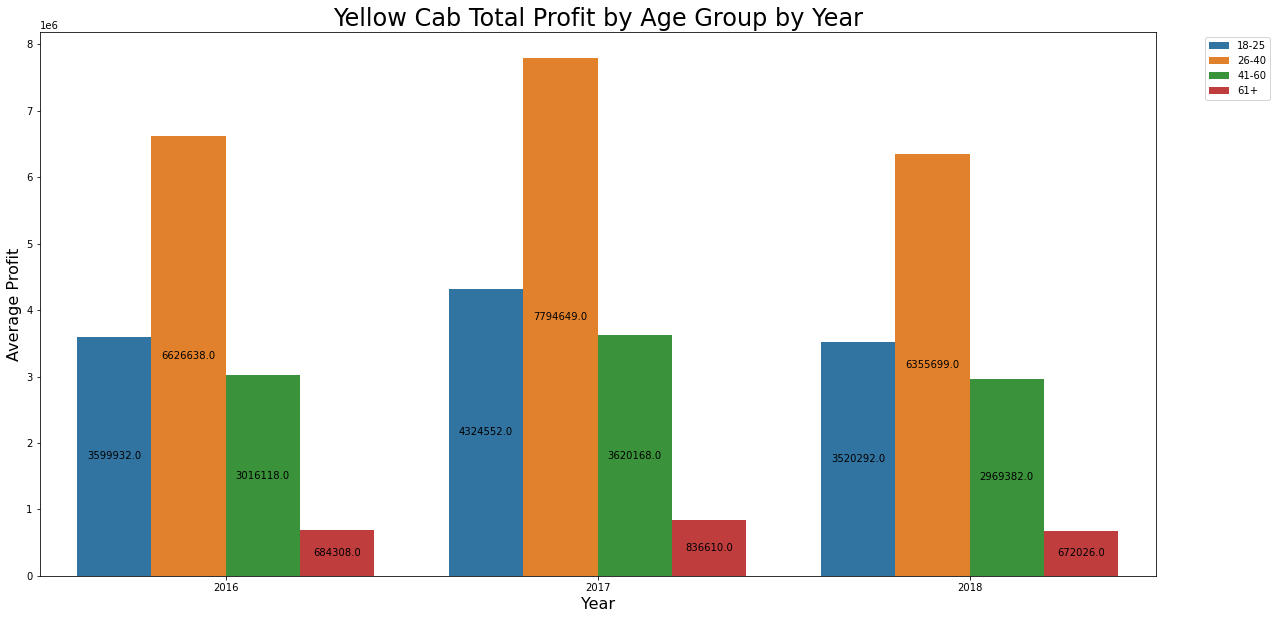

In [56]:
df9 = yellow_cab_df.groupby(['Year', 'Age_Group']).agg(sum_profit=("Profit", 'sum')) #creating table
df9 = df9.reset_index()
ax = sns.barplot(x="Year",y="sum_profit", hue="Age_Group",data=df9) #creating graph
for c in ax.containers: #generating labels
    labels = [v.get_height() if v.get_height() > 0 else '' for v in c]
    labels = np.round(labels)
    ax.bar_label(c, labels=labels, label_type='center')
plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left")
plt.title('Yellow Cab Total Profit by Age Group by Year', fontsize=24)
plt.ylabel('Average Profit', fontsize=16)
plt.xlabel('Year', fontsize=16)
plt.gcf().set_size_inches(20, 10)
plt.show()

It seems that the Yellow Cab company has a very similar profit contribution based on the year and age group to the spread of number of rides.

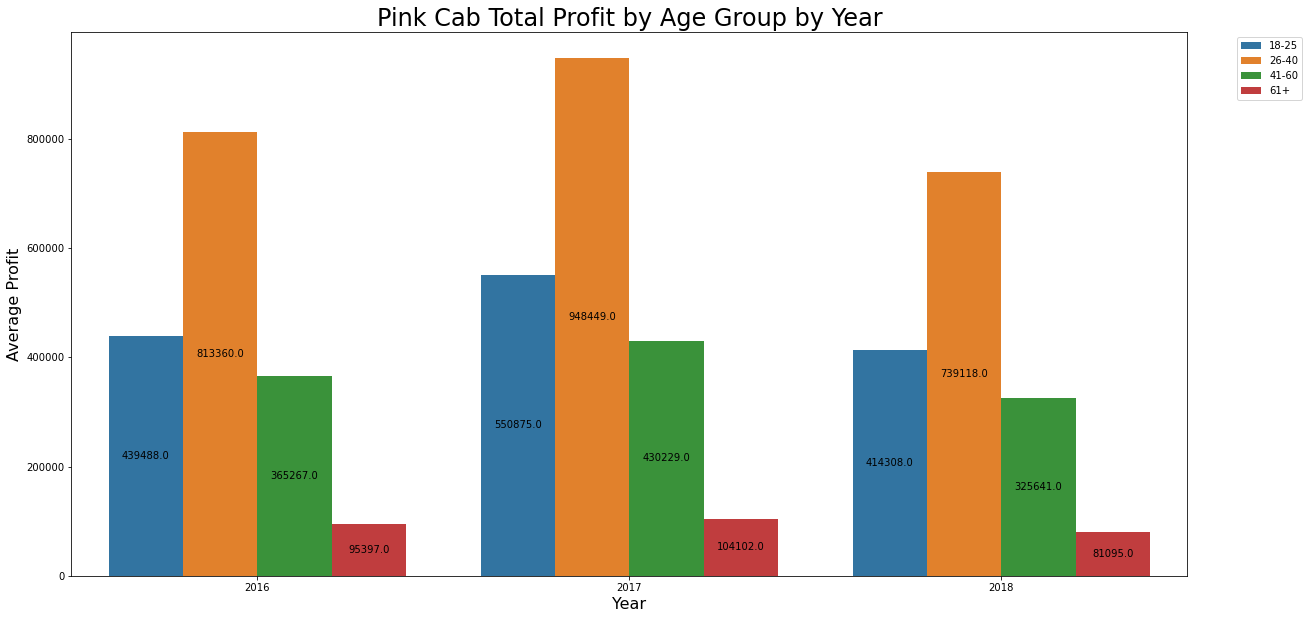

In [57]:
df10 = pink_cab_df.groupby(['Year', 'Age_Group']).agg(sum_profit=("Profit", 'sum')) #creating table
df10 = df10.reset_index()
ax = sns.barplot(x="Year",y="sum_profit", hue="Age_Group",data=df10) #creating graph
for c in ax.containers: #generating labels
    labels = [v.get_height() if v.get_height() > 0 else '' for v in c]
    labels = np.round(labels)
    ax.bar_label(c, labels=labels, label_type='center')
plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left")
plt.title('Pink Cab Total Profit by Age Group by Year', fontsize=24)
plt.ylabel('Average Profit', fontsize=16)
plt.xlabel('Year', fontsize=16)
plt.gcf().set_size_inches(20, 10)
plt.show()

As expected, there is a similar level of contribution for Pink Cab to that of Yellow Cab.

Now we will move onto a different section, and examine the number of unique users that utilize each company by city.

In [58]:
#creating pivot table
count_city_pivot = pd.pivot_table(cab_df, values ='Customer_ID', index='City', columns='Company', aggfunc=pd.Series.nunique)
display(count_city_pivot)

Company,Pink Cab,Yellow Cab
City,,
ATLANTA GA,1322,2595
AUSTIN TX,1354,1914
BOSTON MA,2463,2997
CHICAGO IL,2859,3000
DALLAS TX,1118,2564
DENVER CO,1145,1681
LOS ANGELES CA,2996,2998
MIAMI FL,1480,2334
NASHVILLE TN,1356,965


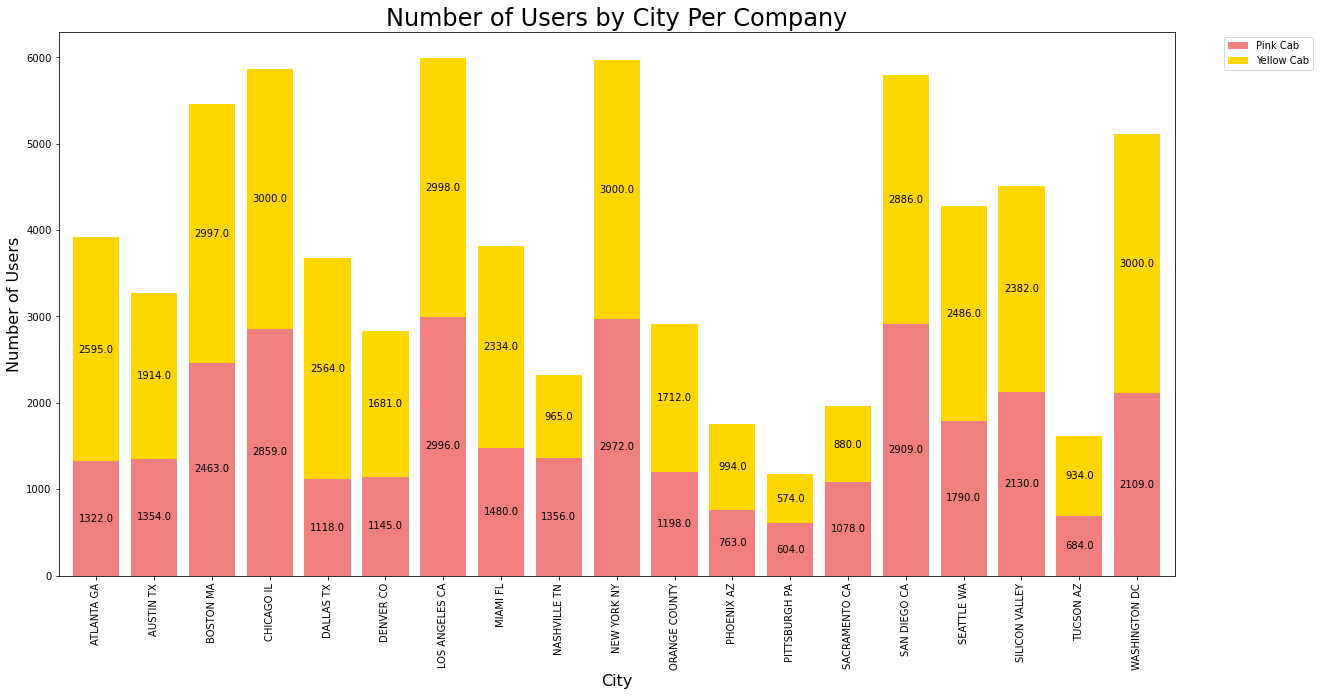

In [59]:
ax =count_city_pivot.plot(kind='bar', color=['lightcoral', 'gold'], stacked=True, width =0.8) 
for c in ax.containers:
    labels = [v.get_height() if v.get_height() > 0 else '' for v in c]
    labels = np.round(labels)
    ax.bar_label(c, labels=labels, label_type='center')
plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left")
plt.title('Number of Users by City Per Company', fontsize=24)
plt.ylabel('Number of Users', fontsize=16)
plt.xlabel('City', fontsize=16)
plt.gcf().set_size_inches(20, 10)
plt.show()

We can see that Pink Cab outperformed Yellow Cab in the cities of San Diego and Nashville, and performed very similar in New York, LA, and Chicago. In all other cities, Yellow Cab had more users.

We will now examine what percentage of total cab users in each city use each company. 

In [60]:
#convert pivot table to dataframe
count_city_df = pd.DataFrame(count_city_pivot)
display(count_city_df)

Company,Pink Cab,Yellow Cab
City,,
ATLANTA GA,1322,2595
AUSTIN TX,1354,1914
BOSTON MA,2463,2997
CHICAGO IL,2859,3000
DALLAS TX,1118,2564
DENVER CO,1145,1681
LOS ANGELES CA,2996,2998
MIAMI FL,1480,2334
NASHVILLE TN,1356,965


In [61]:
#creating list of number of users by city
users= []
for i in range(0, len(city_data)):
    if city_data['City'][i] in count_city_df.index:
        users.append(city_data['Users'][i])
print(users)

[' 302,149 ', ' 164,468 ', ' 144,132 ', ' 17,675 ', ' 27,247 ', ' 12,994 ', ' 69,995 ', ' 6,133 ', ' 22,157 ', ' 24,701 ', ' 12,421 ', ' 14,978 ', ' 25,063 ', ' 5,712 ', ' 7,044 ', ' 3,643 ', ' 127,001 ', ' 9,270 ', ' 80,021 ']


In [62]:
#adding column of total users to dataframe
count_city_df['Total_Users'] = users
display(count_city_df)

Company,Pink Cab,Yellow Cab,Total_Users
City,,,
ATLANTA GA,1322,2595,"302,149"
AUSTIN TX,1354,1914,"164,468"
BOSTON MA,2463,2997,"144,132"
CHICAGO IL,2859,3000,"17,675"
DALLAS TX,1118,2564,"27,247"
DENVER CO,1145,1681,"12,994"
LOS ANGELES CA,2996,2998,"69,995"
MIAMI FL,1480,2334,"6,133"
NASHVILLE TN,1356,965,"22,157"


In [63]:
count_city_df.reset_index()

Company,City,Pink Cab,Yellow Cab,Total_Users
0,ATLANTA GA,1322,2595,"302,149"
1,AUSTIN TX,1354,1914,"164,468"
2,BOSTON MA,2463,2997,"144,132"
3,CHICAGO IL,2859,3000,"17,675"
4,DALLAS TX,1118,2564,"27,247"
5,DENVER CO,1145,1681,"12,994"
6,LOS ANGELES CA,2996,2998,"69,995"
7,MIAMI FL,1480,2334,"6,133"
8,NASHVILLE TN,1356,965,"22,157"
9,NEW YORK NY,2972,3000,"24,701"


In [64]:
#converting column to integer
count_city_df['Total_Users'] = count_city_df['Total_Users'].str.replace(',', '').astype(float)

In [65]:
#calculating percentage of pink cab and yellow cab users
ppc= []
pyc=[]
for i in range(0, len(count_city_df)):
    ppc.append((count_city_df['Pink Cab'][i] / count_city_df['Total_Users'][i]) *100)
    pyc.append((count_city_df['Yellow Cab'][i] / count_city_df['Total_Users'][i]) *100)
count_city_df['Percent_Pink'] = ppc
count_city_df['Percent_Yellow'] = pyc
display(count_city_df)

Company,Pink Cab,Yellow Cab,Total_Users,Percent_Pink,Percent_Yellow
City,,,,,
ATLANTA GA,1322,2595,302149.0,0.437532,0.858848
AUSTIN TX,1354,1914,164468.0,0.823260,1.163752
BOSTON MA,2463,2997,144132.0,1.708850,2.079344
CHICAGO IL,2859,3000,17675.0,16.175389,16.973126
DALLAS TX,1118,2564,27247.0,4.103204,9.410210
DENVER CO,1145,1681,12994.0,8.811759,12.936740
LOS ANGELES CA,2996,2998,69995.0,4.280306,4.283163
MIAMI FL,1480,2334,6133.0,24.131746,38.056416
NASHVILLE TN,1356,965,22157.0,6.119962,4.355283


In [66]:
#creating pink pivot table
pp_city_pivot = pd.pivot_table(count_city_df, values ='Percent_Pink', index='City')
display(pp_city_pivot)

Company,Percent_Pink
City,
ATLANTA GA,0.437532
AUSTIN TX,0.823260
BOSTON MA,1.708850
CHICAGO IL,16.175389
DALLAS TX,4.103204
DENVER CO,8.811759
LOS ANGELES CA,4.280306
MIAMI FL,24.131746
NASHVILLE TN,6.119962


In [67]:
#creating yellow pivot table
py_city_pivot = pd.pivot_table(count_city_df, values ='Percent_Yellow', index='City')
display(py_city_pivot)

Company,Percent_Yellow
City,
ATLANTA GA,0.858848
AUSTIN TX,1.163752
BOSTON MA,2.079344
CHICAGO IL,16.973126
DALLAS TX,9.410210
DENVER CO,12.936740
LOS ANGELES CA,4.283163
MIAMI FL,38.056416
NASHVILLE TN,4.355283


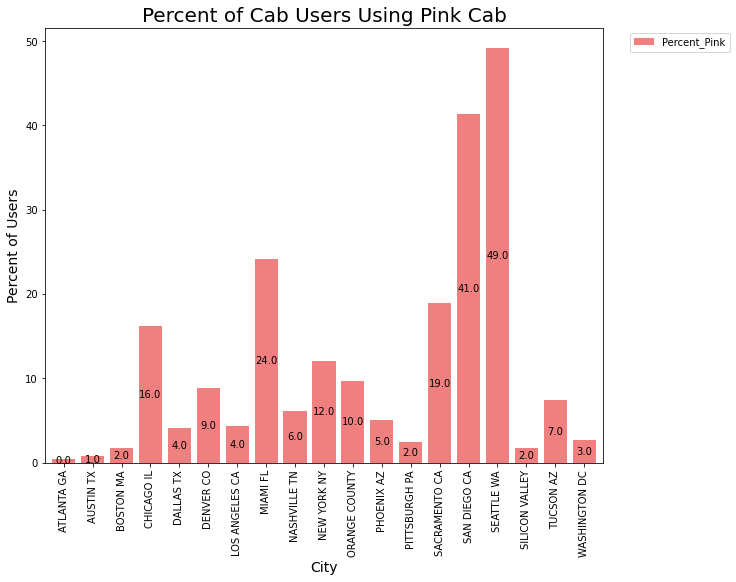

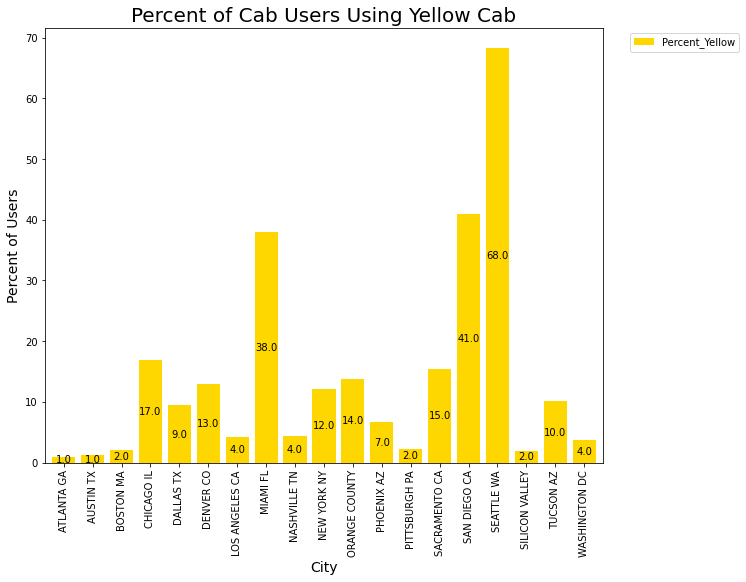

In [68]:
#graphing the two pivot tables
ax1 = pp_city_pivot.plot(kind='bar', color=['lightcoral'], width =0.8)
for c in ax1.containers:
    labels = [v.get_height() if v.get_height() > 0 else '' for v in c]
    labels = np.round(labels)
    ax1.bar_label(c, labels=labels, label_type='center')
plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left")
plt.title('Percent of Cab Users Using Pink Cab', fontsize=20)
plt.ylabel('Percent of Users', fontsize=14)
plt.xlabel('City', fontsize=14)
plt.gcf().set_size_inches(10, 8)

ax2 = py_city_pivot.plot(kind='bar', color=['gold'], width=0.8)
for c in ax2.containers:
    labels = [v.get_height() if v.get_height() > 0 else '' for v in c]
    labels = np.round(labels)
    ax2.bar_label(c, labels=labels, label_type='center')
plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left")
plt.title('Percent of Cab Users Using Yellow Cab', fontsize=20)
plt.ylabel('Percent of Users', fontsize=14)
plt.xlabel('City', fontsize=14)
plt.gcf().set_size_inches(10, 8)
plt.show()

Similar to our number of users, it appears that overall they contribute percentage-wise very similarly. It appears that for some cities such as San Diego and Seattle, these two companies make up the majority of the clients overall, but in other cities such as Atlanta and Austin, they contribute much less. Yellow Cab users tend to make up a large majority compared to Pink Cab in most cities.

Now we will examine the seasonality of the data.

In [69]:
df11 = cab_df.groupby(['Date_of_Travel', 'Company']).agg(Customer_Count=("Customer_ID", 'count')) #creating dataframe by grouping
df11 = df11.reset_index()

In [70]:
df11.head()

,Date_of_Travel,Company,Customer_Count
0,2016-01-02,Pink Cab,41
1,2016-01-02,Yellow Cab,140
2,2016-01-03,Pink Cab,52
3,2016-01-03,Yellow Cab,126
4,2016-01-04,Pink Cab,4


In [71]:
pink_cust = df11[df11['Company'] == 'Pink Cab'] #separating based on company
pink_cust = pink_cust.drop(columns='Company')
yellow_cust = df11[df11['Company'] == 'Yellow Cab']
yellow_cust = yellow_cust.drop(columns='Company')

In [72]:
pink_cust['Date_of_Travel'] = pd.to_datetime(pink_cust['Date_of_Travel']) #converting to datetime
yellow_cust['Date_of_Travel'] = pd.to_datetime(yellow_cust['Date_of_Travel'])

In [73]:
pink_cust.set_index('Date_of_Travel', inplace=True) #resetting index
yellow_cust.set_index('Date_of_Travel', inplace=True)

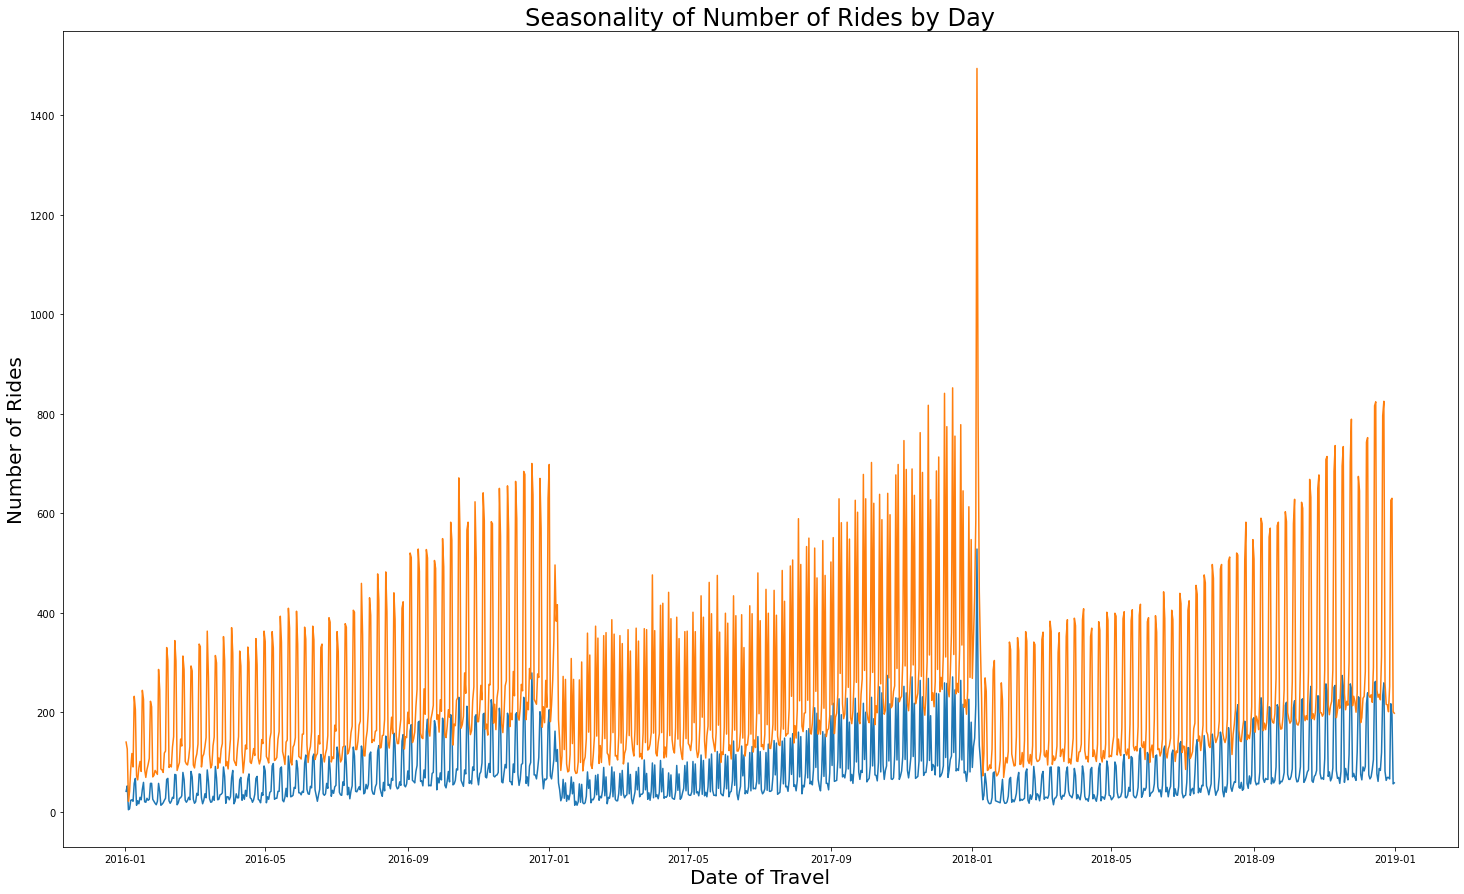

In [74]:
#plotting yearly data
plt.plot(pink_cust)
plt.plot(yellow_cust)
plt.title('Seasonality of Number of Rides by Day', fontsize=24)
plt.xlabel('Date of Travel', fontsize=20)
plt.ylabel('Number of Rides', fontsize=20)
plt.gcf().set_size_inches(25, 15)
plt.show()

We can see that there is definitely seasonality in the data. The number of rides steadily increases throughout the year, with the highest being just before the new year, then it drops and starts again. Let us see if there is also seasonality monthly.

In [75]:
#creating monthly data for pink cab and yellow cab
pink_count_monthly = []
pink_date_monthly= []
yellow_count_monthly = []
yellow_date_monthly =[]
for i in range(0,len(df11)):
    if df11['Company'][i] == 'Pink Cab' and date(2018, 3, 1) <= df11['Date_of_Travel'][i] <= date(2018,3,31):
        pink_count_monthly.append(df11['Customer_Count'][i])
        pink_date_monthly.append(df11['Date_of_Travel'][i])
    elif df11['Company'][i] == 'Yellow Cab' and date(2018, 3, 1) <= df11['Date_of_Travel'][i] <= date(2018,3,31):
        yellow_count_monthly.append(df11['Customer_Count'][i])
        yellow_date_monthly.append(df11['Date_of_Travel'][i])

In [76]:
#combining into dataframe
pink_cust_monthly = pd.DataFrame()
yellow_cust_monthly = pd.DataFrame()
pink_cust_monthly['Date_of_Travel'] = pink_date_monthly
pink_cust_monthly['Customer_Count'] = pink_count_monthly
yellow_cust_monthly['Date_of_Travel'] = yellow_date_monthly
yellow_cust_monthly['Customer_Count'] = yellow_count_monthly

In [77]:
#Converting to datetime
pink_cust_monthly['Date_of_Travel'] = pd.to_datetime(pink_cust_monthly['Date_of_Travel'])
yellow_cust_monthly['Date_of_Travel'] = pd.to_datetime(yellow_cust_monthly['Date_of_Travel'])

In [78]:
#resetting index
pink_cust_monthly.set_index('Date_of_Travel', inplace=True)
yellow_cust_monthly.set_index('Date_of_Travel', inplace=True)

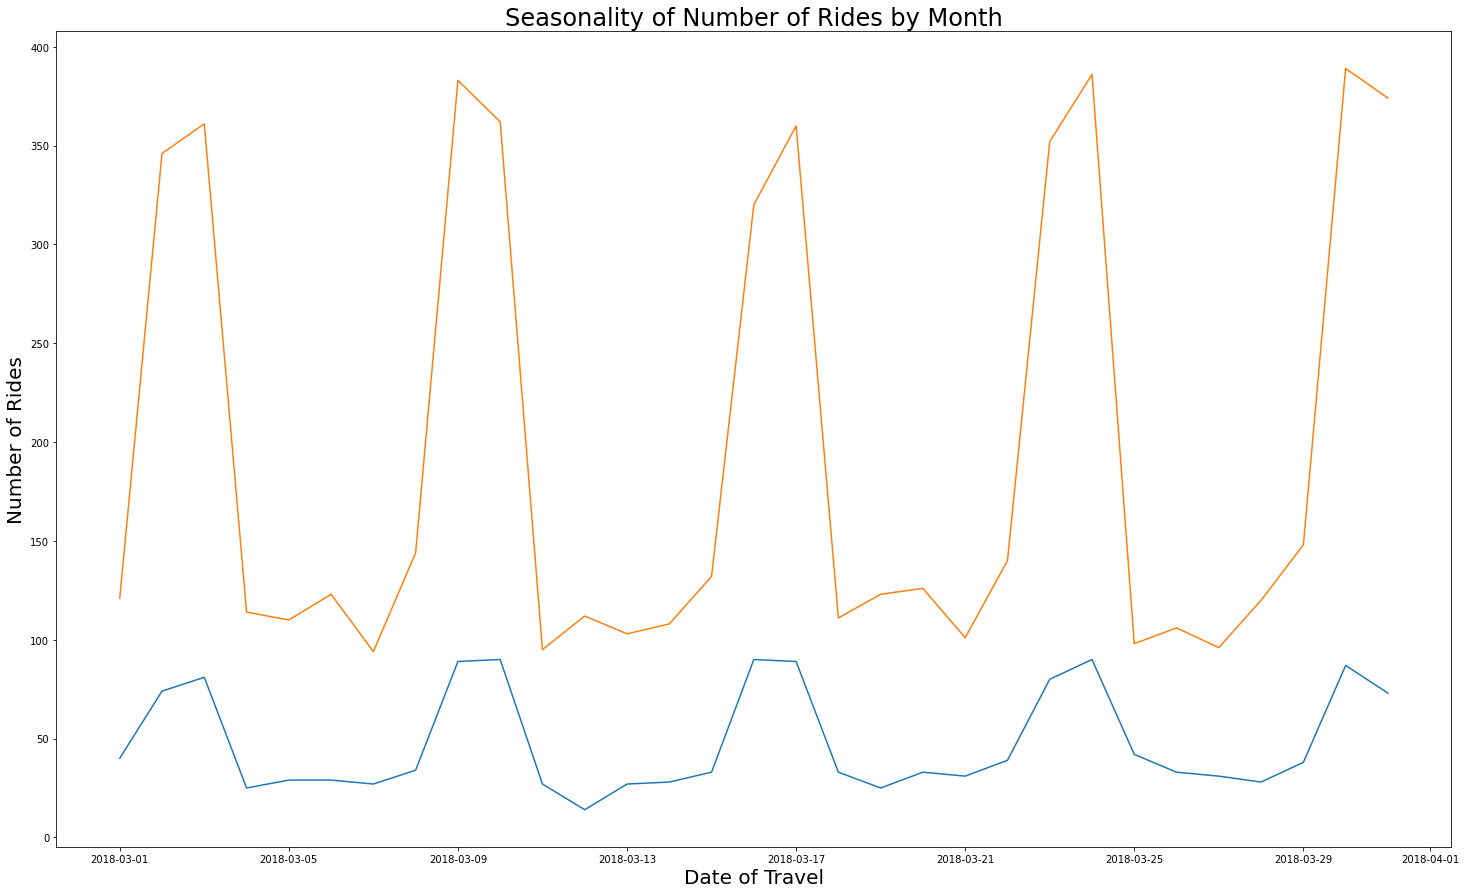

In [79]:
#plotting the graph
plt.plot(pink_cust_monthly)
plt.plot(yellow_cust_monthly)
plt.title('Seasonality of Number of Rides by Month', fontsize=24)
plt.xlabel('Date of Travel', fontsize=20)
plt.ylabel('Number of Rides', fontsize=20)
plt.gcf().set_size_inches(25, 15)
plt.show()

We can see that there is also seasonality in the data on a monthly basis. It seems there is a spike in number of rides on the third of the month and this repeats weekly. 

Now we will examine the seasonality of the profit to see if this matches the seasonality of the number of rides.

In [80]:
df12 = cab_df.groupby(['Date_of_Travel', 'Company']).agg(profit=("Profit", 'sum')) #creating dataframe by grouping
df12 = df12.reset_index()
df12.head()

,Date_of_Travel,Company,profit
0,2016-01-02,Pink Cab,4809.4210
1,2016-01-02,Yellow Cab,45295.6412
2,2016-01-03,Pink Cab,10620.5820
3,2016-01-03,Yellow Cab,38449.5288
4,2016-01-04,Pink Cab,428.5910


In [81]:
df12['Date_of_Travel'] = pd.to_datetime(df12['Date_of_Travel']) #converting to datetime

In [82]:
#sorting by company
pyearly = df12[df12['Company'] == 'Pink Cab']
pyearly.drop(columns='Company', inplace=True)
yyearly = df12[df12['Company'] == 'Yellow Cab']
yyearly.drop(columns='Company', inplace=True)

C:\Users\alyss\anaconda3\lib\site-packages\pandas\core\frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [83]:
#resetting index
pyearly.set_index('Date_of_Travel', inplace=True)
yyearly.set_index('Date_of_Travel', inplace=True)

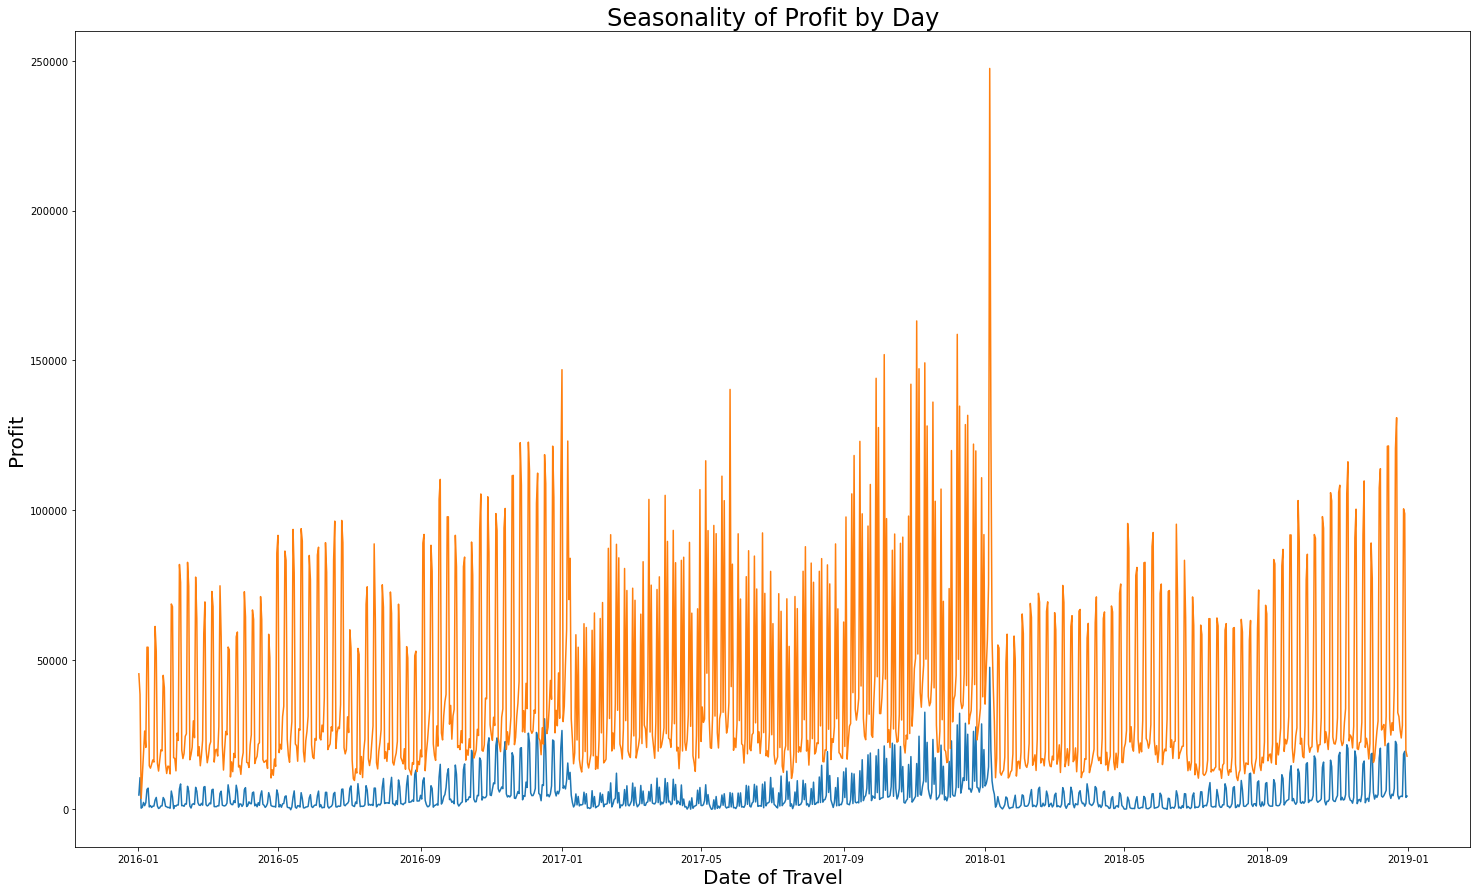

In [84]:
#plotting graph
plt.plot(pyearly)
plt.plot(yyearly)
plt.title('Seasonality of Profit by Day', fontsize=24)
plt.xlabel('Date of Travel', fontsize=20)
plt.ylabel('Profit', fontsize=20)
plt.gcf().set_size_inches(25, 15)
plt.show()

We can see that there is a similar increase in profit seasonally, with the largest amount towards the end of the year. However the increase is much more slight, and appears more stable towards the beginning of the year. 

Let us now look at quarterly profit tables.

In [85]:
#resetting index
pyearly.reset_index(inplace=True)
yyearly.reset_index(inplace=True)

In [86]:
pquarterly = pyearly.groupby(pyearly['Date_of_Travel'].dt.to_period('Q'))['profit'].sum().reset_index()
display(pquarterly)

,Date_of_Travel,profit
0,2016Q1,249229.590
1,2016Q2,215246.063
2,2016Q3,381375.523
3,2016Q4,867660.048
4,2017Q1,358923.005
5,2017Q2,256717.349
6,2017Q3,466195.359
7,2017Q4,951819.195
8,2018Q1,331039.887
9,2018Q2,175183.830


In [87]:
yquarterly = yyearly.groupby(yyearly['Date_of_Travel'].dt.to_period('Q'))['profit'].sum().reset_index()
display(yquarterly)

,Date_of_Travel,profit
0,2016Q1,2.760242e+06
1,2016Q2,3.479802e+06
2,2016Q3,3.197748e+06
3,2016Q4,4.489204e+06
4,2017Q1,3.602691e+06
5,2017Q2,3.924204e+06
6,2017Q3,3.760759e+06
7,2017Q4,5.288324e+06
8,2018Q1,3.122696e+06
9,2018Q2,3.235419e+06


We can see that Yellow Cab is also performing better than Pink Cab on a quarterly basis as well.

Now we will examine how the day of the week affects the number of rides and the profits for each company.

In [88]:
weekday =[] #adding a column for day of the week to a pivot table
for i in range (0, len(cab_df)):
    weekday.append(cab_df['Date_of_Travel'][i].strftime('%A'))
cab_df['Weekday'] = weekday

In [89]:
daily_cab = pd.pivot_table(cab_df, values ='Customer_ID', index='Weekday', columns='Company', aggfunc='count')
display(daily_cab)

Company,Pink Cab,Yellow Cab
Weekday,,
Friday,19249,62153
Monday,7032,22705
Saturday,18253,59981
Sunday,16475,53835
Thursday,9549,30198
Tuesday,7077,22783
Wednesday,7076,23026


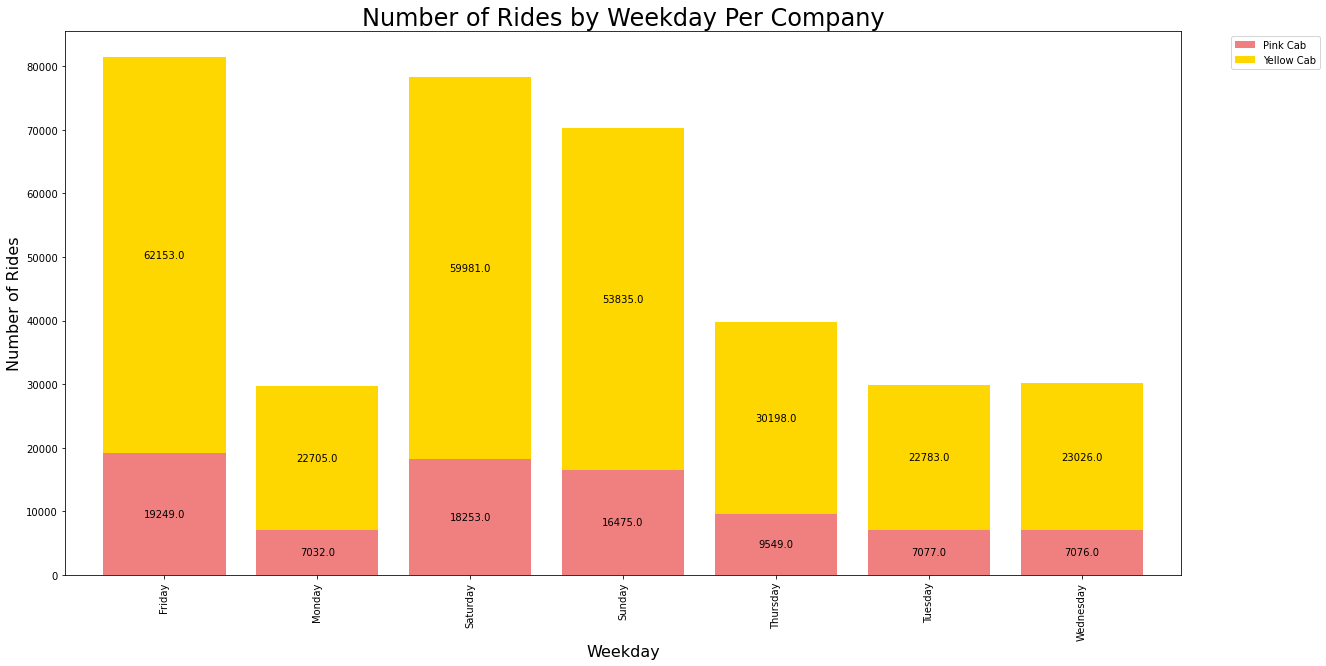

In [90]:
ax = daily_cab.plot(kind='bar', color=['lightcoral', 'gold'], stacked=True, width=0.8)
for c in ax.containers:
    labels = [v.get_height() if v.get_height() > 0 else '' for v in c]
    labels= np.round(labels)
    ax.bar_label(c, labels=labels, label_type='center')
plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left")
plt.title('Number of Rides by Weekday Per Company', fontsize=24)
plt.ylabel('Number of Rides', fontsize=16)
plt.xlabel('Weekday', fontsize=16)
plt.gcf().set_size_inches(20, 10)
plt.show()

We can see that both companies perform better in number of rides on Fridays, Saturdays and Sundays. Fridays are the most ride-heavy, and Monday is the lightest. Yellow Cab has significantly more rides on each day of the week than Pink Cab. 

We will now compare the number of unique users per day of the week.

In [91]:
#creating pivot table with unique customer count per weekday
udaily_cab = pd.pivot_table(cab_df, values ='Customer_ID', index='Weekday', columns='Company', aggfunc=pd.Series.nunique)
display(udaily_cab)

Company,Pink Cab,Yellow Cab
Weekday,,
Friday,13755,23131
Monday,6185,13723
Saturday,13248,22760
Sunday,12334,21661
Thursday,7985,16285
Tuesday,6167,13751
Wednesday,6153,13936


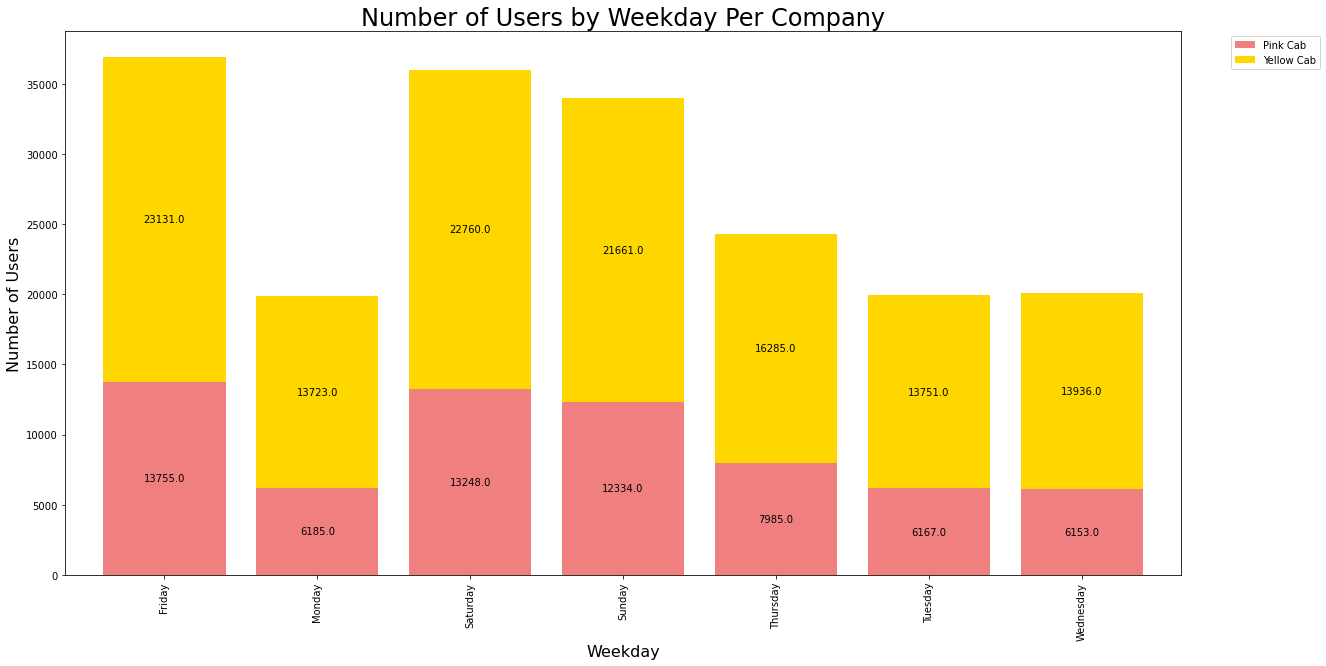

In [92]:
ax = udaily_cab.plot(kind='bar', color=['lightcoral', 'gold'], stacked=True, width=0.8)
for c in ax.containers:
    labels = [v.get_height() if v.get_height() > 0 else '' for v in c]
    labels= np.round(labels)
    ax.bar_label(c, labels=labels, label_type='center')
plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left")
plt.title('Number of Users by Weekday Per Company', fontsize=24)
plt.ylabel('Number of Users', fontsize=16)
plt.xlabel('Weekday', fontsize=16)
plt.gcf().set_size_inches(20, 10)
plt.show()

We can see that both companies still have more users on Fridays, Saturdays, and Sundays. However, the Pink Cab company does have significantly more unique users than would be expected based on the number of rides. Yellow Cab still has more users daily though.

Now we will examine the spread of clients over the approximate distance traveled in kilometers.

In [93]:
distance_cab = pd.pivot_table(cab_df, values ='Customer_ID', index='Rounded_KM', columns='Company', aggfunc='count')
display(distance_cab)

Company,Pink Cab,Yellow Cab
Rounded_KM,,
0,6895,22529
5,10190,32720
10,10068,32831
15,10319,33106
20,10131,33125
25,10077,32760
30,10109,32731
35,9867,32031
40,5791,18681


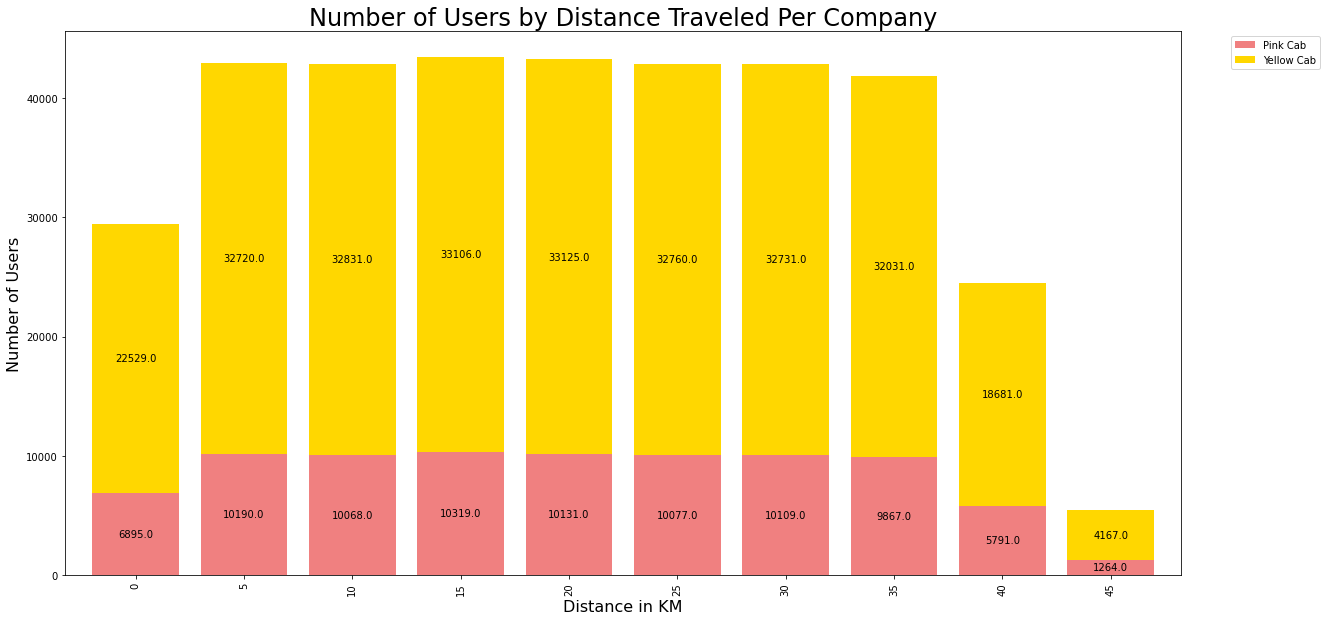

In [94]:
ax = distance_cab.plot(kind='bar', color=['lightcoral', 'gold'], stacked=True, width=0.8)
for c in ax.containers:
    labels = [v.get_height() if v.get_height() > 0 else '' for v in c]
    labels= np.round(labels)
    ax.bar_label(c, labels=labels, label_type='center')
plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left")
plt.title('Number of Users by Distance Traveled Per Company', fontsize=24)
plt.ylabel('Number of Users', fontsize=16)
plt.xlabel('Distance in KM', fontsize=16)
plt.gcf().set_size_inches(20, 10)
plt.show()

It is clear that the majority of rides are less than 45 KM, with the majority falling in the 5-35KM mark. The values seem stable across each category within the section of 5-35KM.

We will now examine if there is any customer preference based on holiday travel.

In [95]:
holidays_df = cab_df[cab_df['Is_Holiday'] == 1] #pulling traveling on holidays to be true
holidays_df.head()

,Customer_ID,Gender,Age,Income,Transaction_ID,Date_of_Travel,Company,City,KM_Traveled,Price_Charged,...,Payment_Mode,Profit,Is_Holiday,Year,Profit_Percentage,Profit_Per_KM,Class,Age_Group,Rounded_KM,Weekday
20,27318,Male,25,13984,10072285,2016-09-04,Pink Cab,ATLANTA GA,45.20,539.01,...,Card,59.8900,1,2016,12.500000,1.325000,2500-15000,18-25,45,Sunday
220,3077,Male,22,16759,10132943,2016-12-31,Yellow Cab,CHICAGO IL,31.80,470.19,...,Cash,12.2700,1,2016,2.679507,0.385849,>15000,18-25,30,Saturday
225,3077,Male,22,16759,10218252,2017-09-03,Pink Cab,CHICAGO IL,18.81,200.94,...,Card,10.9590,1,2017,5.768472,0.582616,>15000,18-25,15,Sunday
226,3077,Male,22,16759,10254762,2017-11-11,Yellow Cab,CHICAGO IL,7.28,110.92,...,Card,18.3184,1,2017,19.781948,2.516264,>15000,18-25,5,Saturday
227,3077,Male,22,16759,10284447,2017-12-24,Pink Cab,CHICAGO IL,39.22,449.92,...,Cash,6.7340,1,2017,1.519452,0.171698,>15000,18-25,35,Sunday


In [96]:
holidays_df = holidays_df.reset_index(drop=True) #resetting index
holidays_df.head()

,Customer_ID,Gender,Age,Income,Transaction_ID,Date_of_Travel,Company,City,KM_Traveled,Price_Charged,...,Payment_Mode,Profit,Is_Holiday,Year,Profit_Percentage,Profit_Per_KM,Class,Age_Group,Rounded_KM,Weekday
0,27318,Male,25,13984,10072285,2016-09-04,Pink Cab,ATLANTA GA,45.20,539.01,...,Card,59.8900,1,2016,12.500000,1.325000,2500-15000,18-25,45,Sunday
1,3077,Male,22,16759,10132943,2016-12-31,Yellow Cab,CHICAGO IL,31.80,470.19,...,Cash,12.2700,1,2016,2.679507,0.385849,>15000,18-25,30,Saturday
2,3077,Male,22,16759,10218252,2017-09-03,Pink Cab,CHICAGO IL,18.81,200.94,...,Card,10.9590,1,2017,5.768472,0.582616,>15000,18-25,15,Sunday
3,3077,Male,22,16759,10254762,2017-11-11,Yellow Cab,CHICAGO IL,7.28,110.92,...,Card,18.3184,1,2017,19.781948,2.516264,>15000,18-25,5,Saturday
4,3077,Male,22,16759,10284447,2017-12-24,Pink Cab,CHICAGO IL,39.22,449.92,...,Cash,6.7340,1,2017,1.519452,0.171698,>15000,18-25,35,Sunday


In [97]:
holidays.head()

,Date,Holiday,WeekDay,Month,Day,Year
0,2004-07-04,4th of July,Sunday,7,4,2004
1,2005-07-04,4th of July,Monday,7,4,2005
2,2006-07-04,4th of July,Tuesday,7,4,2006
3,2007-07-04,4th of July,Wednesday,7,4,2007
4,2008-07-04,4th of July,Friday,7,4,2008


In [98]:
#loop to add the holiday name to the dataframe
holiday_name =[] 
for x in range(0, len(holidays_df)):
    date = holidays_df['Date_of_Travel'][x]
    for y in range(0, len(holidays)):
        if date == holidays['Date'][y]:
            holiday_name.append(holidays['Holiday'][y])
            break        

C:\Users\alyss\anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  


In [99]:
holidays_df['Holiday_Name'] = holiday_name
holidays_df.head()

,Customer_ID,Gender,Age,Income,Transaction_ID,Date_of_Travel,Company,City,KM_Traveled,Price_Charged,...,Profit,Is_Holiday,Year,Profit_Percentage,Profit_Per_KM,Class,Age_Group,Rounded_KM,Weekday,Holiday_Name
0,27318,Male,25,13984,10072285,2016-09-04,Pink Cab,ATLANTA GA,45.20,539.01,...,59.8900,1,2016,12.500000,1.325000,2500-15000,18-25,45,Sunday,Labor Day Weekend
1,3077,Male,22,16759,10132943,2016-12-31,Yellow Cab,CHICAGO IL,31.80,470.19,...,12.2700,1,2016,2.679507,0.385849,>15000,18-25,30,Saturday,New Year’s Eve
2,3077,Male,22,16759,10218252,2017-09-03,Pink Cab,CHICAGO IL,18.81,200.94,...,10.9590,1,2017,5.768472,0.582616,>15000,18-25,15,Sunday,Labor Day Weekend
3,3077,Male,22,16759,10254762,2017-11-11,Yellow Cab,CHICAGO IL,7.28,110.92,...,18.3184,1,2017,19.781948,2.516264,>15000,18-25,5,Saturday,Veterans Day
4,3077,Male,22,16759,10284447,2017-12-24,Pink Cab,CHICAGO IL,39.22,449.92,...,6.7340,1,2017,1.519452,0.171698,>15000,18-25,35,Sunday,Christmas Eve


In [100]:
#finding number of rides based on holiday
holiday_cab = pd.pivot_table(holidays_df, values ='Customer_ID', index='Holiday_Name', columns='Company', aggfunc='count')
display(holiday_cab)

Company,Pink Cab,Yellow Cab
Holiday_Name,,
4th of July,108,339
Christmas Day,337,994
Christmas Eve,480,1531
Columbus Day,188,485
Eastern Easter,187,853
Juneteenth,172,575
Labor Day,178,488
Labor Day Weekend,899,2465
"Martin Luther King, Jr. Day",59,266


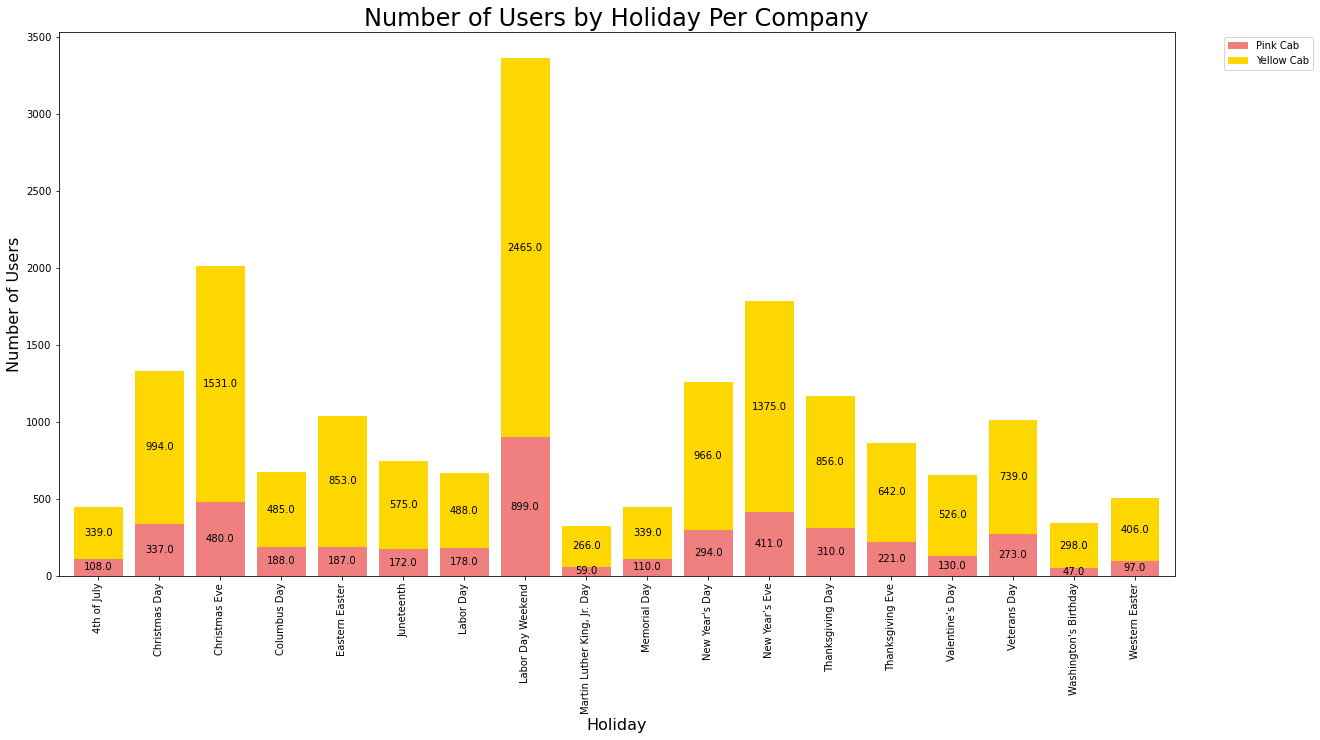

In [101]:
ax = holiday_cab.plot(kind='bar', color=['lightcoral', 'gold'], stacked=True, width=0.8)
for c in ax.containers:
    labels = [v.get_height() if v.get_height() > 0 else '' for v in c]
    labels= np.round(labels)
    ax.bar_label(c, labels=labels, label_type='center')
plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left")
plt.title('Number of Users by Holiday Per Company', fontsize=24)
plt.ylabel('Number of Users', fontsize=16)
plt.xlabel('Holiday', fontsize=16)
plt.gcf().set_size_inches(20, 10)
plt.show()

We can see that the majority of rides occur on Labor Day Weekend, and the Eves of Christmas and New Years. Overall it appears that more users are utilizing Yellow Cab than Pink Cab.

Let us see if the same is true by city as well.

In [102]:
yellow_holiday = holidays_df[holidays_df['Company'] == 'Yellow Cab']
pink_holiday = holidays_df[holidays_df['Company'] == 'Pink Cab']

In [103]:
pink_holiday.head()

,Customer_ID,Gender,Age,Income,Transaction_ID,Date_of_Travel,Company,City,KM_Traveled,Price_Charged,...,Profit,Is_Holiday,Year,Profit_Percentage,Profit_Per_KM,Class,Age_Group,Rounded_KM,Weekday,Holiday_Name
0,27318,Male,25,13984,10072285,2016-09-04,Pink Cab,ATLANTA GA,45.20,539.01,...,59.890,1,2016,12.500000,1.325000,2500-15000,18-25,45,Sunday,Labor Day Weekend
2,3077,Male,22,16759,10218252,2017-09-03,Pink Cab,CHICAGO IL,18.81,200.94,...,10.959,1,2017,5.768472,0.582616,>15000,18-25,15,Sunday,Labor Day Weekend
4,3077,Male,22,16759,10284447,2017-12-24,Pink Cab,CHICAGO IL,39.22,449.92,...,6.734,1,2017,1.519452,0.171698,>15000,18-25,35,Sunday,Christmas Eve
9,4289,Male,19,28719,10284493,2017-12-31,Pink Cab,CHICAGO IL,36.16,429.58,...,6.508,1,2017,1.538272,0.179978,>15000,18-25,35,Sunday,New Year’s Eve
10,5777,Male,24,28850,10367735,2018-09-01,Pink Cab,CHICAGO IL,6.36,78.51,...,9.186,1,2018,13.250822,1.444340,>15000,18-25,5,Saturday,Labor Day Weekend


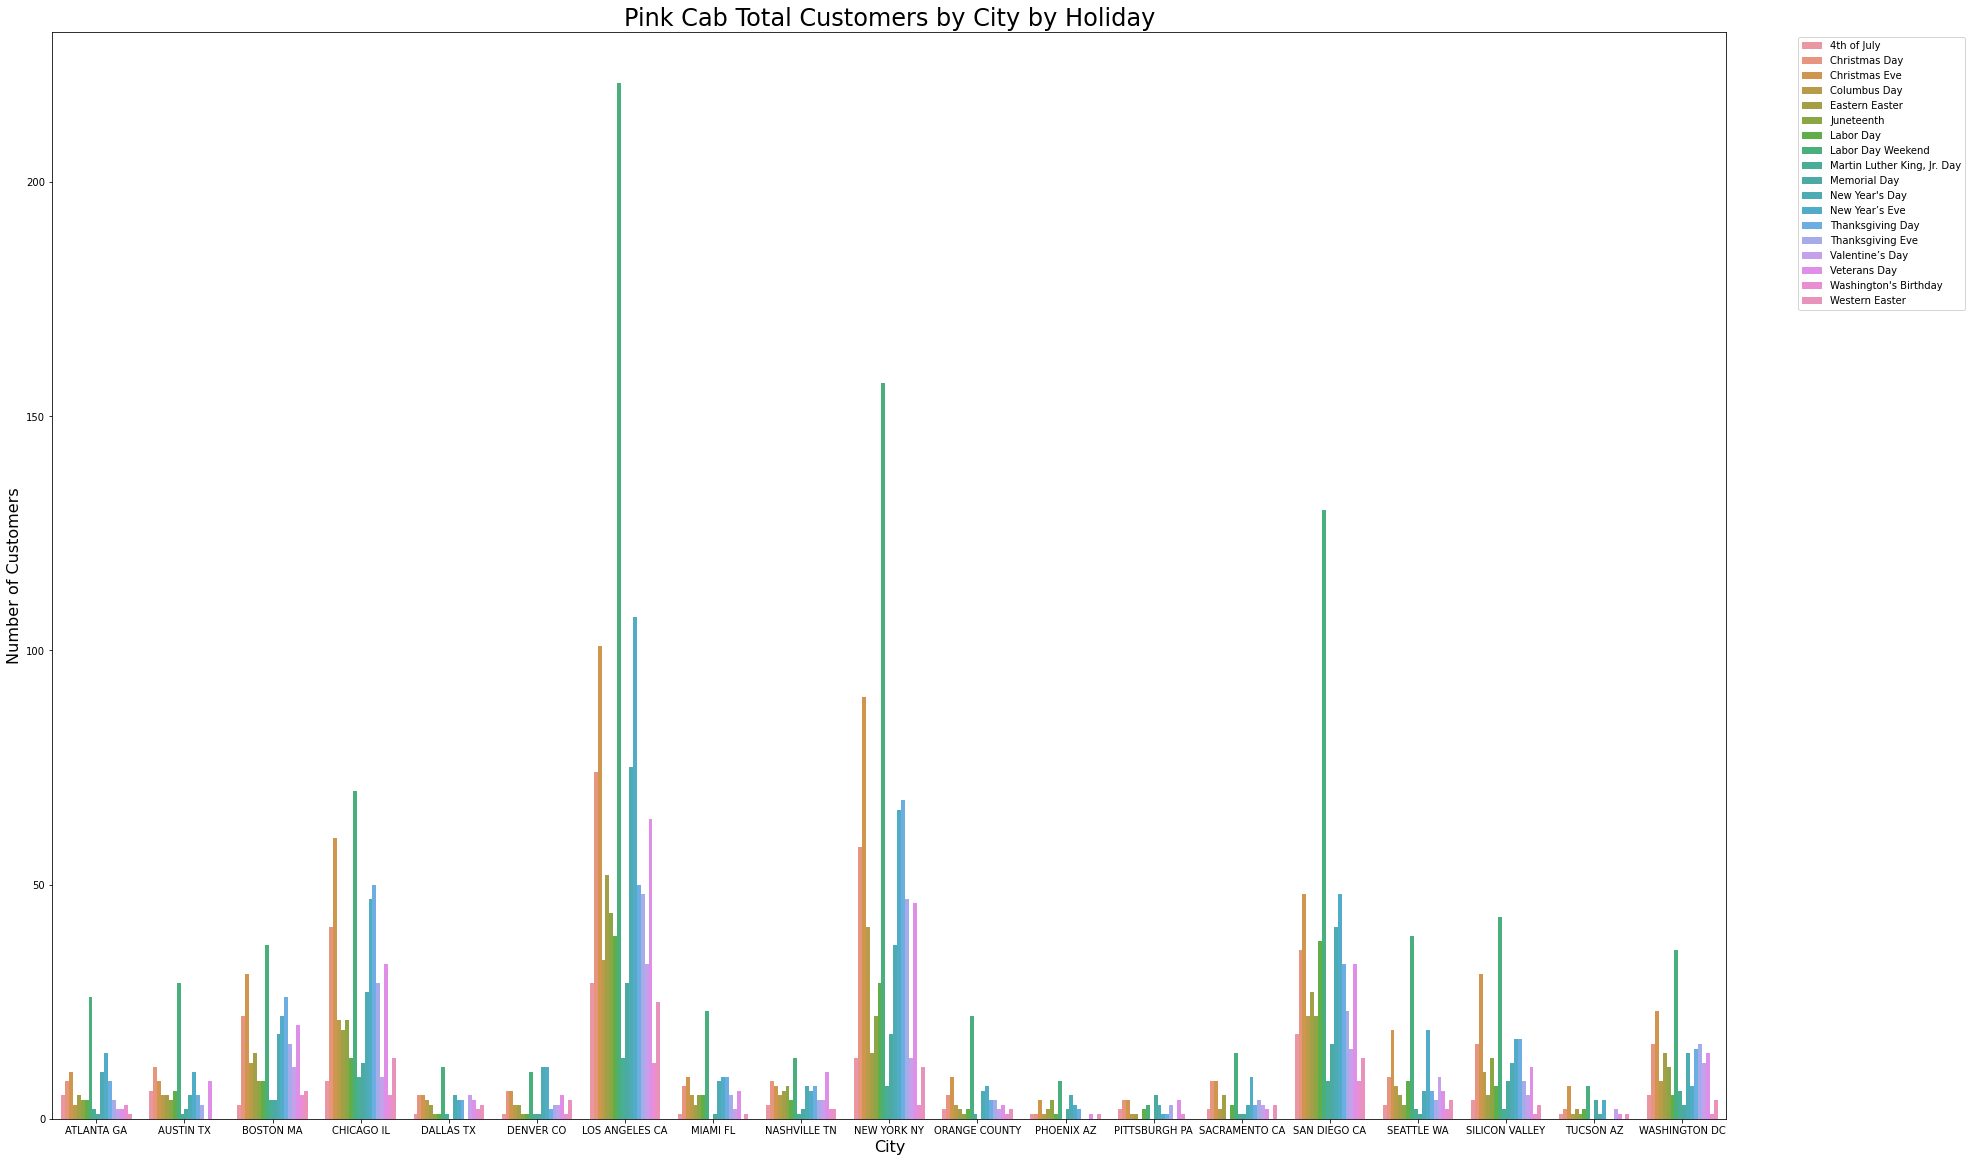

In [104]:
df13 = pink_holiday.groupby(['City', 'Holiday_Name']).agg(count=("Customer_ID", 'count'))
df13 = df13.reset_index()
sns.barplot(x="City",y="count", hue="Holiday_Name",data=df13)
plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left")
plt.title('Pink Cab Total Customers by City by Holiday', fontsize =24)
plt.ylabel('Number of Customers', fontsize=16)
plt.xlabel('City', fontsize=16)
plt.gcf().set_size_inches(30, 20)
plt.show()

It appears that for Pink Cab, most people travel on holidays in Los Angeles, New York, and San Diego. Let us see if the spread is the same for Yellow Cab.

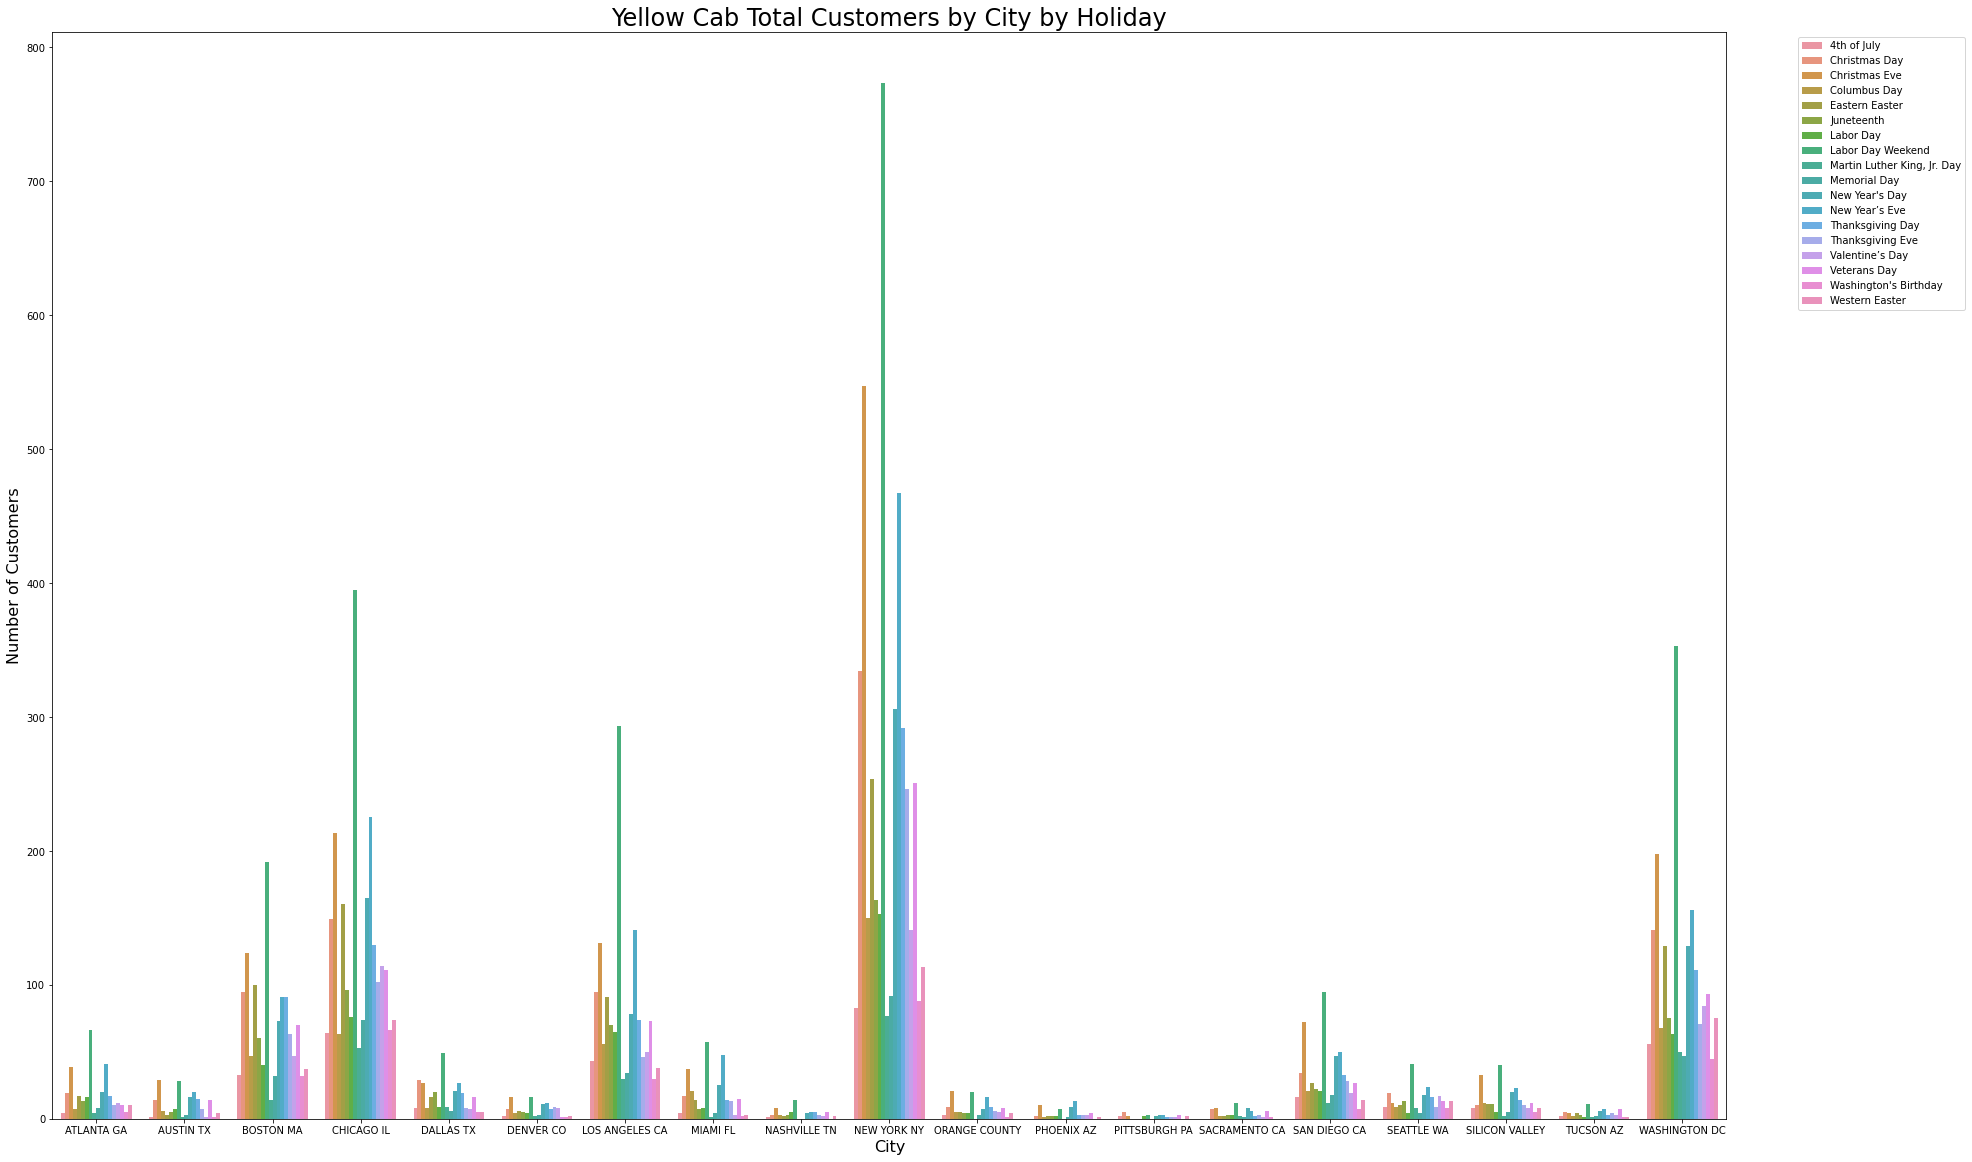

In [105]:
df14 = yellow_holiday.groupby(['City', 'Holiday_Name']).agg(count=("Customer_ID", 'count'))
df14 = df14.reset_index()
sns.barplot(x="City",y="count", hue="Holiday_Name",data=df14)
plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left")
plt.title('Yellow Cab Total Customers by City by Holiday', fontsize=24)
plt.ylabel('Number of Customers', fontsize=16)
plt.xlabel('City', fontsize=16)
plt.gcf().set_size_inches(30, 20)
plt.show()

Surprisingly there is some difference between these two. For Yellow Cab, the majority of the holiday travelers are in New York, followed by Chicago and Washington DC.

Now that we have made an analysis of the performance of both of these companies, we will make recommendations.

## Conclusion and Recommendations

It is our recommendation based on this analysis that Yellow Cab is a better company for investment than that of Pink Cab.

Yellow Cab has more customer reach in the majority of cities evaluated, and while Pink Cab does have more in a few, the difference is vast in the number of customers across all points.

Yellow Cab also reaches more clients across all age groups than that of Pink Cab.

In addition, Yellow Cab makes over twice the profit per KM than that of Pink Cab.

While both companies appear to be experiencing loss, and it is projected to drop some in future years for both companies, Pink Cab has significantly lower profit margins, and thus any drop is more likely to affect them.

Based on all of these points, it is our recommendation that XYZ invests in Yellow Cab.
